# Import Statements

In [1]:
#import dependencies
import os
import struct
from array import array
import sys
import numpy as np

#For Model Design
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
# cnn model with batch normalization for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

#For Plotting
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

#For visualizing Decision Tree
import graphviz 
import pydotplus

#Removal of warning
import warnings
warnings.filterwarnings('ignore')

#path of train images
#/content/drive/MyDrive/Handwritten Digit Prediction/DataSet/train-images-idx3-ubyte.idx3-ubyte
#path of train labels
#/content/drive/MyDrive/Handwritten Digit Prediction/DataSet/train-labels-idx1-ubyte.idx1-ubyte
#path of test images
#/content/drive/MyDrive/Handwritten Digit Prediction/DataSet/t10k-image-idx3-ubyte.idx3-ubyte
#path of test labels
#/content/drive/MyDrive/Handwritten Digit Prediction/DataSet/train-labels-idx1-ubyte.idx1-ubyte


# Dataloader Class

In [2]:
# Dataloader class
class DataLoader(object):
    def __init__(self, path='.'):
        self.path = "/content/drive/MyDrive/Handwritten Digit Prediction/DataSet/"

        self.test_img_path = self.path + 't10k-images-idx3-ubyte'
        self.test_lbl_path = self.path + 't10k-labels-idx1-ubyte'

        self.train_img_path = self.path + 'train-images-idx3-ubyte'
        self.train_lbl_path = self.path + 'train-labels-idx1-ubyte'

        self.test_images = []
        self.test_labels = []

        self.train_images = []
        self.train_labels = []

    def load_testing(self):
        ims, labels = self.load(self.test_img_path,self.test_lbl_path)

        self.test_images = ims
        self.test_labels = labels

        return ims, labels

    def load_training(self):
        ims, labels = self.load(self.train_img_path,self.train_lbl_path)

        self.train_images = ims
        self.train_labels = labels

        return ims, labels

    @classmethod
    def load(cls, path_img, path_lbl):
        with open(path_lbl, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('We got an incorrect Magic Number,''got {}'.format(magic))

            labels = array("B", file.read())

        with open(path_img, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('We got an incorrect Magic Number,''got {}'.format(magic))

            image_data = array("B", file.read())

        images = []
        for i in range(size):
            images.append([0] * rows * cols)

        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]

        return images, labels




In [3]:
# Dataloader class
class DataLoader(object):
    def __init__(self, path='.'):
        self.path = "/content/drive/MyDrive/Handwritten Digit Prediction/DataSet/"

        self.test_img_path = self.path + 't10k-images-idx3-ubyte'
        self.test_lbl_path = self.path + 't10k-labels-idx1-ubyte'

        self.train_img_path = self.path + 'train-images-idx3-ubyte'
        self.train_lbl_path = self.path + 'train-labels-idx1-ubyte'

        self.test_images = []
        self.test_labels = []

        self.train_images = []
        self.train_labels = []

    def load_testing(self):
        ims, labels = self.load(self.test_img_path,self.test_lbl_path)

        self.test_images = ims
        self.test_labels = labels

        return ims, labels

    def load_training(self):
        ims, labels = self.load(self.train_img_path,self.train_lbl_path)

        self.train_images = ims
        self.train_labels = labels

        return ims, labels

    @classmethod
    def load(cls, path_img, path_lbl):
        with open(path_lbl, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('We got an incorrect Magic Number,''got {}'.format(magic))

            labels = array("B", file.read())

        with open(path_img, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('We got an incorrect Magic Number,''got {}'.format(magic))

            image_data = array("B", file.read())

        images = []
        for i in range(size):
            images.append([0] * rows * cols)

        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]

        return images, labels

    


# Loading Data and Division of data available for training into Train Set and Validation Set

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = DataLoader()
print('\nLoading DataSet Done!')

img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)
print('\nTraining Data has been Loaded!')

img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)
print('\nTesting Data has been Loaded!')

#Features
X = train_img

#Labels
y = train_labels

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)
print('\nDataSet has been split into train and Validation set! 10% of data will be used as Validation Set')


Loading DataSet Done!

Training Data has been Loaded!

Testing Data has been Loaded!

DataSet has been split into train and Validation set! 10% of data will be used as Validation Set


# Image Analysis

In [ ]:
img=list(test_img[0])
width = 28
threshold=200
render = ''
for i in range(len(img)):
  if i % width == 0:
    render += '\n'
  if img[i] > threshold:
    render += '$ '
  else:
    render += '. '

print(render)


. . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . $ $ $ $ $ $ . . . . . . . . . . . . . . . . 
. . . . . . . . . . . $ $ $ $ $ $ $ $ $ $ . . . . . . . 
. . . . . . . . . . . . . . . . . . . $ $ . . . . . . . 
. . . . . . . . . . . . . . . . . . . $ $ . . . . . . . 
. . . . . . . . . . . . . . . . . . $ $ . . . . . . . . 
. . . . . . . . . . . . . . . . . . $ $ . . . . . . . . 
. . . . . . . . . . . . . . . . . $ $ . . . . . . . . . 
. . . . . . . . . . . . . . . . . $ . . . . . . . . . . 
. . . . . . . . . . . . . . . . $ $ . . . . . . . . . . 
. . . . . . . . . . . . . . . 

In [ ]:
img=list(test_img[0])
width = 28
threshold=100
render = ''
for i in range(len(img)):
  if i % width == 0:
    render += '\n'
  if img[i] > threshold:
    render += str(img[i])
  else:
    render += '...'

print(render)


....................................................................................
....................................................................................
....................................................................................
....................................................................................
....................................................................................
....................................................................................
....................................................................................
.....................185159151......................................................
..................222254254254254241198198198198198198198198170.....................
.....................114...114163227254225254254254250229254254140..................
.........................................................236254106..................
.........................................................253209.

# Verfying Data Quality

In [ ]:
max=np.max(test_img)
min=np.min(test_img)
print('We are checking whether maximum value cross 255')
print('The maximum value of individual pixel is '+str(max))
print('The minimum value of individual pixel is '+str(min))
print('Does array have any nan - '+str(np.isnan(test_img).any()))
print('Data type of each pixel - '+str(type(test_img[0][0])))

We are checking whether maximum value cross 255
The maximum value of individual pixel is 255
The minimum value of individual pixel is 0
Does array have any nan - False
Data type of each pixel - <class 'numpy.int64'>


# Stochastic Gradient Descent

## Training and Validation

In [6]:
# Stochastic Gradient Descent (SGD)
# Execution time - 3 mins

print('\n----Training and Performance Metric calculation on Train and Validation Set----')

sgdclf = SGDClassifier()
sgdclf.fit(X_train,y_train)

#Predicting outcome
sgd_validation_y_pred = sgdclf.predict(X_test)

#Calculate Accuracy
sgd_validation_accuracy = accuracy_score(y_test, sgd_validation_y_pred)

#Precision Score
sgd_validation_precision_score = precision_score(y_test, sgd_validation_y_pred, average='macro')

#Recall Score
sgd_validation_recall_score = recall_score(y_test, sgd_validation_y_pred, average='macro')

#Confusion Matrix
sgd_validation_conf_mat = confusion_matrix(y_test,sgd_validation_y_pred)

print('\nSGD Trained Classifier Accuracy on Validation Image Data: ',sgd_validation_accuracy)
print('\nPrecision Score: ',sgd_validation_precision_score)
print('\nRecall Score: ',sgd_validation_recall_score)
print('\nPredicted Values: ',sgd_validation_y_pred)
print('\nConfusion Matrix: \n',sgd_validation_conf_mat)




----Training and Performance Metric calculation on Train and Validation Set----

SGD Trained Classifier Accuracy on Validation Image Data:  0.8801666666666667

Precision Score:  0.8920869884896258

Recall Score:  0.8784755036267005

Predicted Values:  [9 6 3 ... 5 8 0]

Confusion Matrix: 
 [[568   0   0   1   0   0   3   0  12   0]
 [  0 663   5   4   0   1   2   1  22   2]
 [  4   6 517   7   3   2  12   5  30   0]
 [  6   4  29 504   0  21   6   6  55   7]
 [  2   4   8   2 512   0   4   0  28  29]
 [  9   0   4  17   2 403  16   1  88  10]
 [  3   1   3   0   5   8 595   0   6   0]
 [  1   6   9   0   4   0   0 497  22  33]
 [  4   7   6   3   2   5   7   0 535   2]
 [  6   5   2   5  19   4   1   5  55 487]]


In [7]:
print('\nAccuracy on Validation Image Data: ',sgd_validation_accuracy)
print('\nPrecision Score: ',sgd_validation_precision_score)
print('\nRecall Score: ',sgd_validation_recall_score)


Accuracy on Validation Image Data:  0.8801666666666667

Precision Score:  0.8920869884896258

Recall Score:  0.8784755036267005


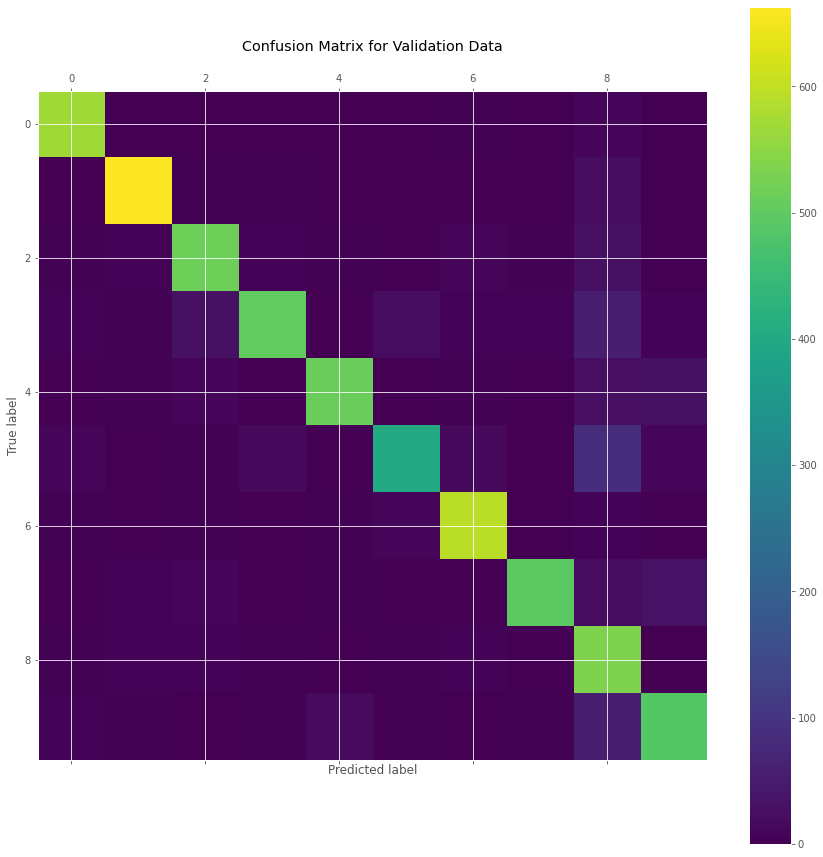

In [8]:
# Plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(sgd_validation_conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



## Prediction on Test Set

In [9]:
# Making Prediction
sgd_test_pred_labels = sgdclf.predict(test_img)

# Calculating Score
sgd_test_accuracy = accuracy_score(test_labels,sgd_test_pred_labels)

# Precision Score
sgd_test_precision_score = precision_score(test_labels, sgd_test_pred_labels, average='macro')

# Recall Score
sgd_test_recall_score = recall_score(test_labels, sgd_test_pred_labels , average='macro')

# Confusion Matrix
sgd_test_conf_mat = confusion_matrix(test_labels,sgd_test_pred_labels)

print('\nPredicted Labels for Test Images: ',sgd_test_pred_labels)
print('\nAccuracy of Classifier on Test Images: ',sgd_test_accuracy)
print('\nPrecision Score: ',sgd_test_precision_score)
print('\nRecall Score: ',sgd_test_recall_score)
print('\nPredicted Values: ',sgd_test_pred_labels)
print('\nConfusion Matrix for Test Data: \n',sgd_test_conf_mat)



Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.8863

Precision Score:  0.8988523513640978

Recall Score:  0.8844007467913986

Predicted Values:  [7 2 1 ... 4 5 6]

Confusion Matrix for Test Data: 
 [[ 949    0    3    3    0    2    6    2   13    2]
 [   1 1089    4    1    0    1    5    1   32    1]
 [   7    6  903   12    6    0   18    6   72    2]
 [   5    0   26  851    1   19    9    8   83    8]
 [   4    5    8    2  868    0   13    3   43   36]
 [  16    2    1   37    7  656   21    7  135   10]
 [  10    2    9    1    5   16  898    0   17    0]
 [   6    9   31    5    6    4    2  887   37   41]
 [   4    4    7    9    7    7    9    1  920    6]
 [   7    7    1    8   28    3    0   15   98  842]]


In [10]:
print('\nAccuracy of Classifier on Test Images: ',sgd_test_accuracy)
print('\nPrecision Score: ',sgd_test_precision_score)
print('\nRecall Score: ',sgd_test_recall_score)


Accuracy of Classifier on Test Images:  0.8863

Precision Score:  0.8988523513640978

Recall Score:  0.8844007467913986


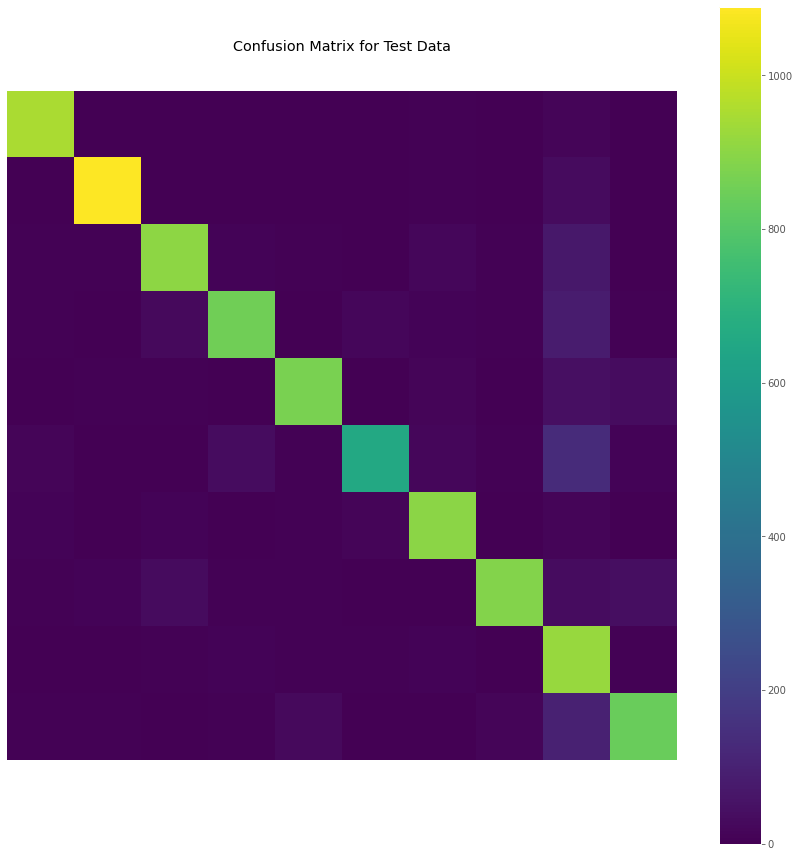

In [11]:
# Plot Confusion Matrix for Test Data
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(sgd_test_conf_mat)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

## Classification Report

In [12]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_labels, sgd_test_pred_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       980
           1       0.97      0.96      0.96      1135
           2       0.91      0.88      0.89      1032
           3       0.92      0.84      0.88      1010
           4       0.94      0.88      0.91       982
           5       0.93      0.74      0.82       892
           6       0.92      0.94      0.93       958
           7       0.95      0.86      0.91      1028
           8       0.63      0.94      0.76       974
           9       0.89      0.83      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.90      0.88      0.89     10000
weighted avg       0.90      0.89      0.89     10000



## Visualization of Predictions made

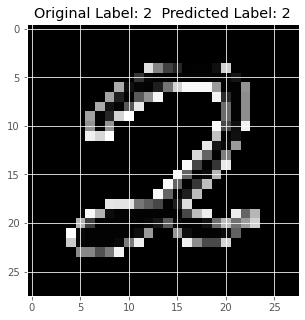

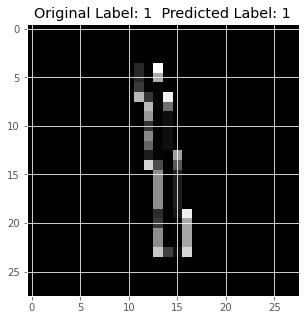

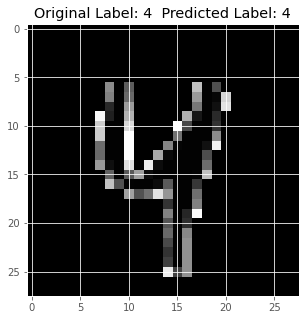

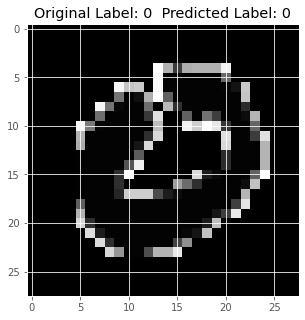

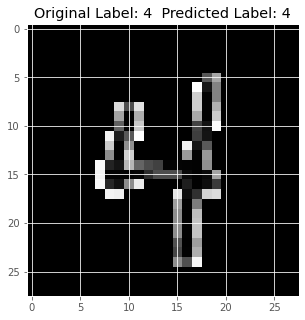

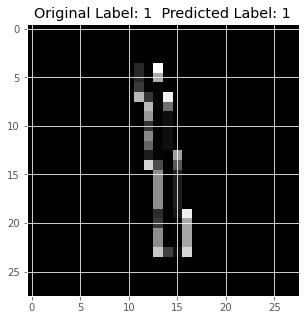

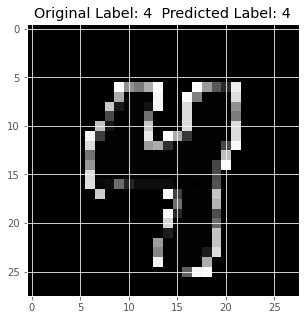

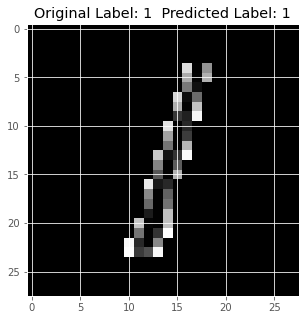

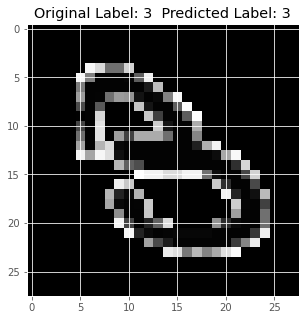

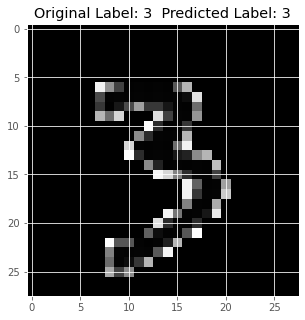

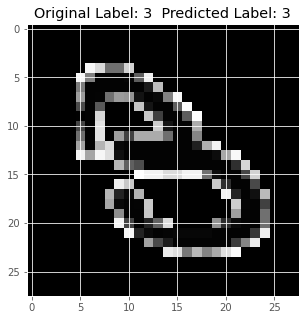

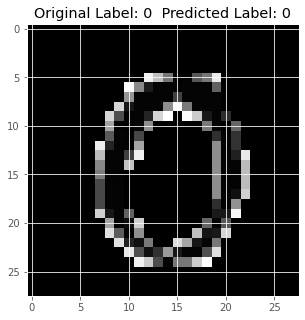

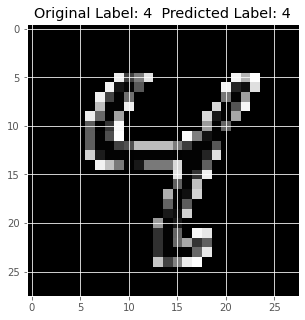

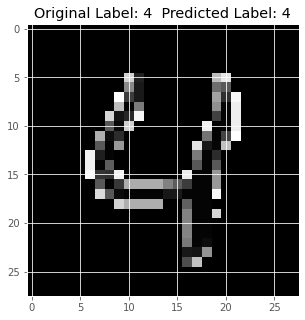

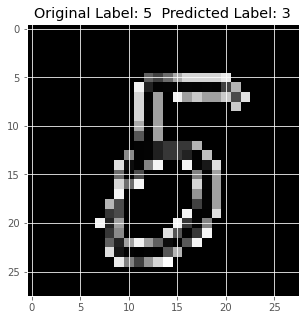

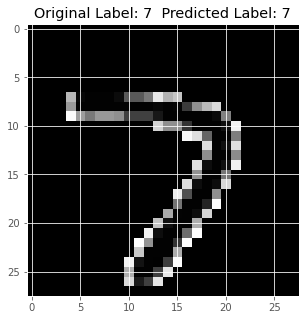

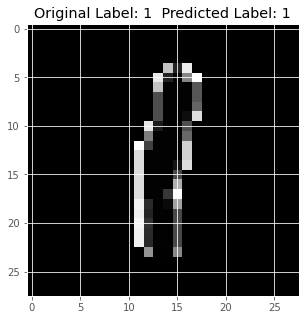

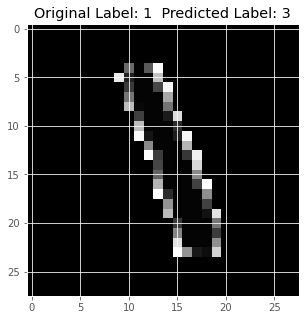

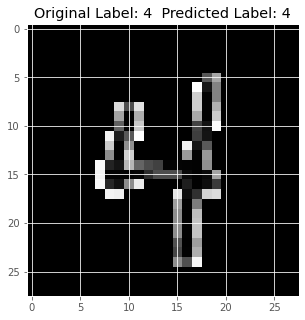

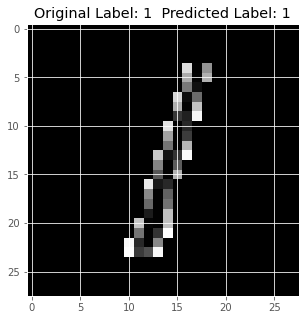

In [ ]:
# Show the Test Images with Original and Predicted Labels
plt.rcParams["figure.figsize"] = (5,5)
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],sgd_test_pred_labels[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()


# Decision Tree

## Training and Testing

In [13]:
# Decision Tree (DT)
# Execution time - 25 seconds

print('\n----Training and Performance Metric calculation on Train and Validation Set----')

dtclf = DecisionTreeClassifier()
dtclf.fit(X_train,y_train)


#Predicting outcome
dt_validation_y_pred = dtclf.predict(X_test)

#Precision Score
dt_validation_precision_score = precision_score(y_test, dt_validation_y_pred, average='macro')

#Recall Score
dt_validation_recall_score = recall_score(y_test, dt_validation_y_pred, average='macro')

#Calculate Accuracy
dt_validation_accuracy = accuracy_score(y_test, dt_validation_y_pred)

#Confusion Matrix
dt_validation_conf_mat = confusion_matrix(y_test,dt_validation_y_pred)

print('\nAccuracy of Decision Tree Trained Classifier on Validation Image Data: ',dt_validation_accuracy)
print('\nPrecision Score: ',dt_validation_precision_score)
print('\nRecall Score: ',dt_validation_recall_score)
print('\nPredicted Values: ',dt_validation_y_pred)
print('\nConfusion Matrix: \n',dt_validation_conf_mat)




----Training and Performance Metric calculation on Train and Validation Set----

Accuracy of Decision Tree Trained Classifier on Validation Image Data:  0.872

Precision Score:  0.8698221053448103

Recall Score:  0.8701444903133426

Predicted Values:  [9 6 3 ... 5 8 0]

Confusion Matrix: 
 [[540   0   9   2   5  12   6   2   7   1]
 [  0 667   6   2   7   4   3   4   6   1]
 [  6   8 507  13   7   7   4  15  14   5]
 [  2   8  24 525   2  32   3  12  17  13]
 [  2   0   5   5 514   7  12   7  10  27]
 [ 10   3   5  28   5 454  13   3  21   8]
 [  9   1   2   4   5  13 574   0  10   3]
 [  2   4   7   9   5   6   0 510   6  23]
 [  8  12  18  13  12  21  13   3 452  19]
 [  5   2   9  16  30   6   1  20  11 489]]


In [14]:
print('\nAccuracy on Validation Image Data: ',dt_validation_accuracy)
print('\nPrecision Score: ',dt_validation_precision_score)
print('\nRecall Score: ',dt_validation_recall_score)


Accuracy on Validation Image Data:  0.872

Precision Score:  0.8698221053448103

Recall Score:  0.8701444903133426


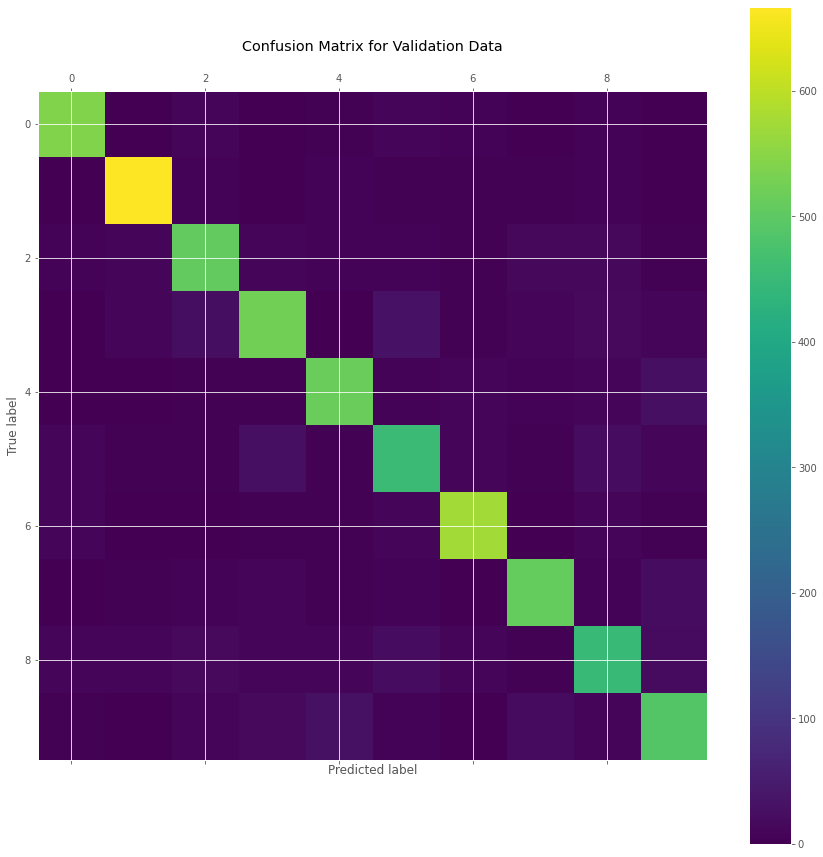

In [15]:
# Plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(dt_validation_conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Prediction on Test Set

In [16]:
# Making Prediction
dt_test_pred_labels = dtclf.predict(test_img)

# Calculating Score
dt_test_accuracy = accuracy_score(test_labels,dt_test_pred_labels)

# Precision Score
dt_test_precision_score = precision_score(test_labels, dt_test_pred_labels, average='macro')

# Recall Score
dt_test_recall_score = recall_score(test_labels, dt_test_pred_labels , average='macro')

# Confusion Matrix
dt_test_conf_mat = confusion_matrix(test_labels,dt_test_pred_labels)

print('\nPredicted Labels for Test Images: ',dt_test_pred_labels)
print('\nAccuracy of Classifier on Test Images: ',dt_test_accuracy)
print('\nPrecision Score: ',dt_test_precision_score)
print('\nRecall Score: ',dt_test_recall_score)
print('\nConfusion Matrix for Test Data: \n',dt_test_conf_mat)



Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.8724

Precision Score:  0.8704587858040208

Recall Score:  0.8705498497328861

Confusion Matrix for Test Data: 
 [[ 915    1    7    8    4   15   13    4    9    4]
 [   1 1095    5    6    1    3    4    8    9    3]
 [   9   13  882   29    9   11   18   20   28   13]
 [   9    8   15  857    5   50    7   13   27   19]
 [   7    5    8    4  851    6   15   11   29   46]
 [  21   13    8   35   12  731   21    8   25   18]
 [  17    2    7    3   27   23  848    3   22    6]
 [   3   15   26   13    4    3    2  924    8   30]
 [  12    6   25   40   18   39   27   13  765   29]
 [   9    6    8   16   41   16    6   19   32  856]]


In [17]:
print('\nAccuracy of Classifier on Test Images: ',dt_test_accuracy)
print('\nPrecision Score: ',dt_test_precision_score)
print('\nRecall Score: ',dt_test_recall_score)


Accuracy of Classifier on Test Images:  0.8724

Precision Score:  0.8704587858040208

Recall Score:  0.8705498497328861


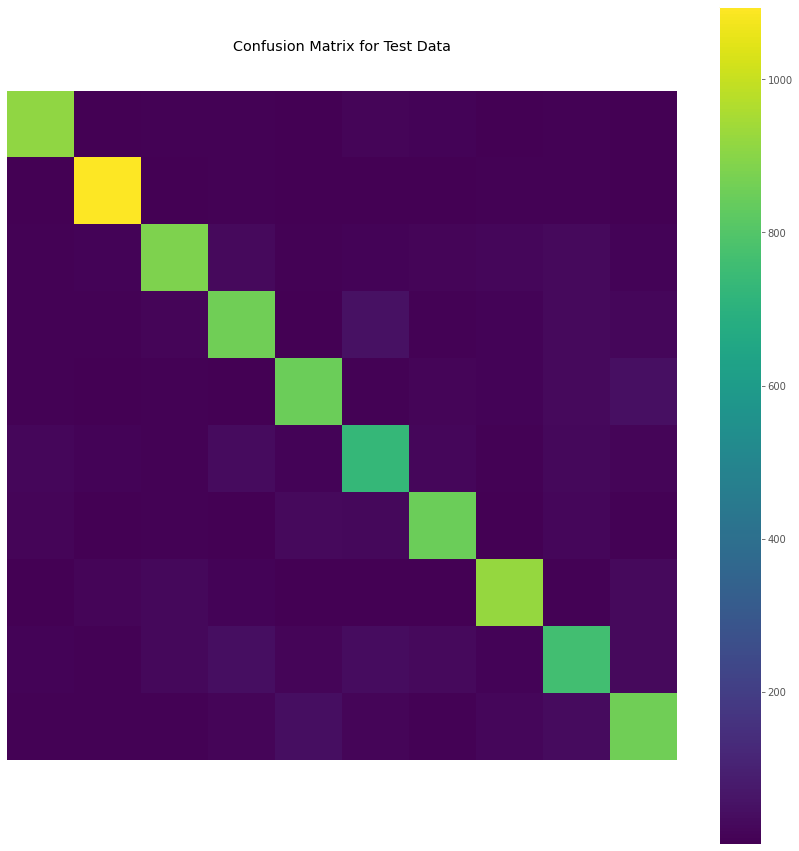

In [18]:
# Plot Confusion Matrix for Test Data
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(dt_test_conf_mat)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

## Classification Report

In [19]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_labels, dt_test_pred_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.94      0.96      0.95      1135
           2       0.89      0.85      0.87      1032
           3       0.85      0.85      0.85      1010
           4       0.88      0.87      0.87       982
           5       0.81      0.82      0.82       892
           6       0.88      0.89      0.88       958
           7       0.90      0.90      0.90      1028
           8       0.80      0.79      0.79       974
           9       0.84      0.85      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## Visualization of Predictions made

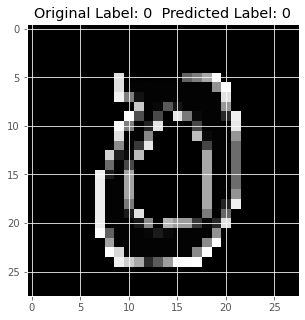

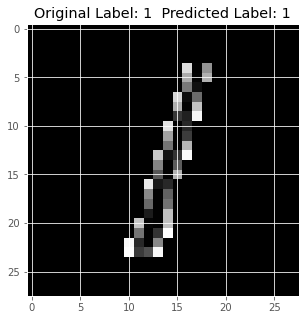

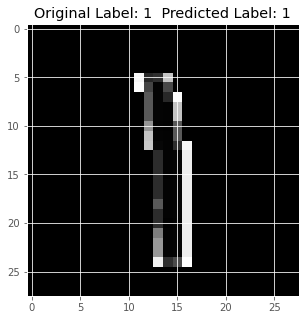

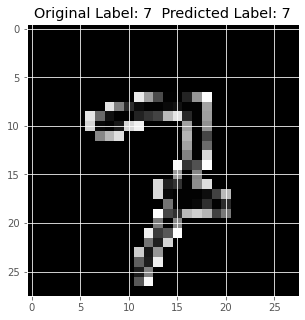

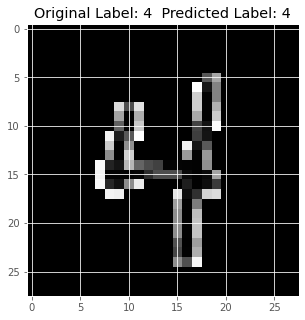

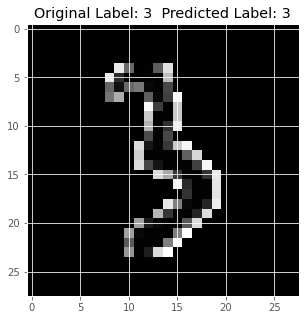

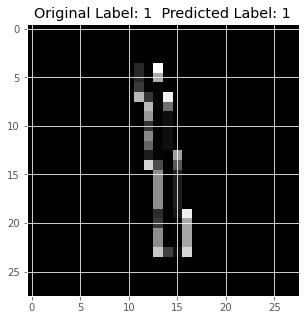

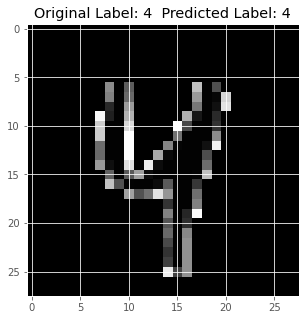

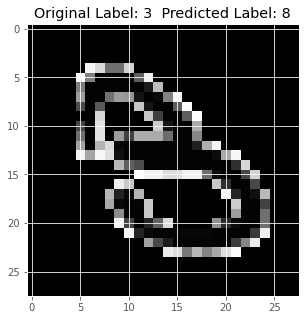

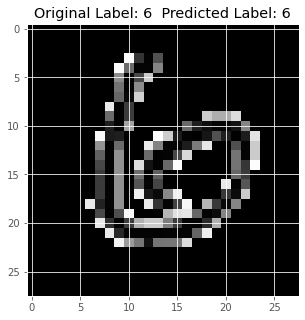

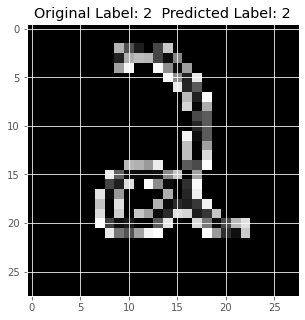

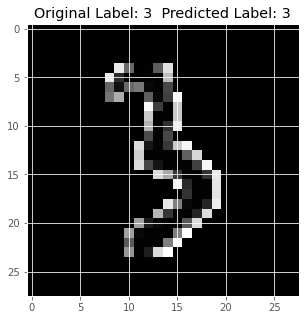

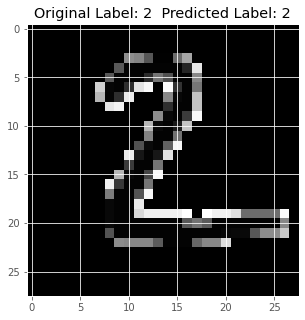

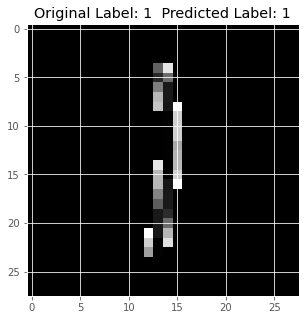

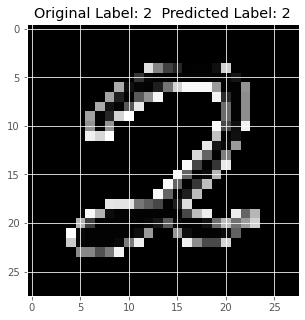

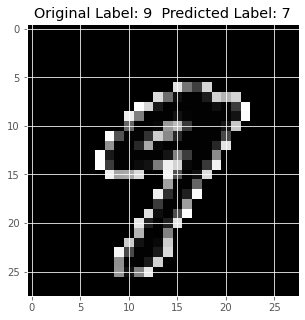

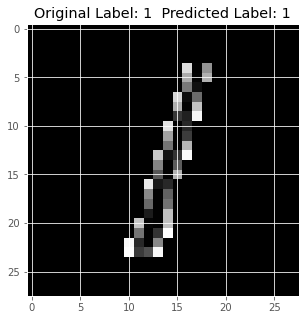

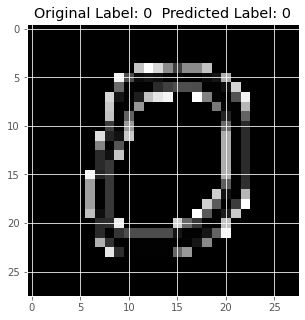

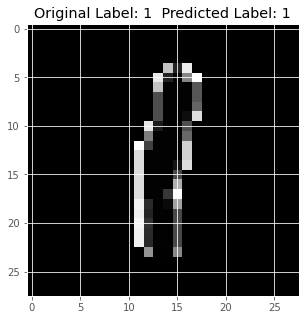

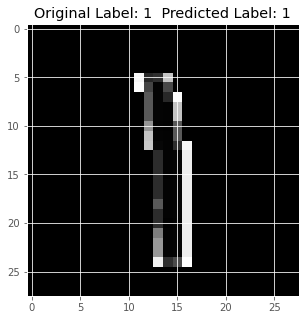

In [ ]:
# Show the Test Images with Original and Predicted Labels
plt.rcParams["figure.figsize"] = (5,5)
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],dt_test_pred_labels[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()

## Image of decision tree

In [ ]:
# Visualizing and saving the tree
dot_data = tree.export_graphviz(dtclf, out_file=None,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("DT_Classifier") 
print('A file named DT_Classifier.pdf has been created which has the decision tree image')

A file named DT_Classifier.pdf has been created which has the decision tree image


# Logistic Regression

## Training and Testing

In [20]:
# Logistic Regression
# Execution time - 50 s

print('\n----Training and Performance Metric calculation on Train and Validation Set----')

lrclf = LogisticRegression()
lrclf.fit(X_train,y_train)

#Predicting outcome
lr_validation_y_pred = lrclf.predict(X_test)

#Calculate Accuracy
lr_validation_accuracy = accuracy_score(y_test, lr_validation_y_pred)

#Precision Score
lr_validation_precision_score = precision_score(y_test, lr_validation_y_pred, average='macro')

#Recall Score
lr_validation_recall_score = recall_score(y_test, lr_validation_y_pred, average='macro')

#Confusion Matrix
lr_validation_conf_mat = confusion_matrix(y_test,lr_validation_y_pred)

print('\nPredicted Values: ',lr_validation_y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',lr_validation_accuracy)
print('\nPrecision Score: ',lr_validation_precision_score)
print('\nRecall Score: ',lr_validation_recall_score)
print('\nConfusion Matrix: \n',lr_validation_conf_mat)



----Training and Performance Metric calculation on Train and Validation Set----

Predicted Values:  [9 6 3 ... 5 8 0]

Accuracy of Classifier on Validation Image Data:  0.9213333333333333

Precision Score:  0.9205129199499449

Recall Score:  0.920288897177538

Confusion Matrix: 
 [[560   0   4   0   1   6   6   1   6   0]
 [  0 676   3   3   0   3   0   1  10   4]
 [  1   7 526  10   5   5  10   9  11   2]
 [  3   5  21 565   0  22   2   3  12   5]
 [  1   1   5   1 548   1   4   0   3  25]
 [  7   1   5  17   1 486   9   1  17   6]
 [  2   0   6   0  10   9 593   0   1   0]
 [  0   3   4   1   4   0   0 533   2  25]
 [  3  15   4  13   3  14   8   2 503   6]
 [  3   2   3   4  15   5   1  14   4 538]]


In [21]:
print('\nAccuracy on Validation Image Data: ',lr_validation_accuracy)
print('\nPrecision Score: ',lr_validation_precision_score)
print('\nRecall Score: ',lr_validation_recall_score)


Accuracy on Validation Image Data:  0.9213333333333333

Precision Score:  0.9205129199499449

Recall Score:  0.920288897177538


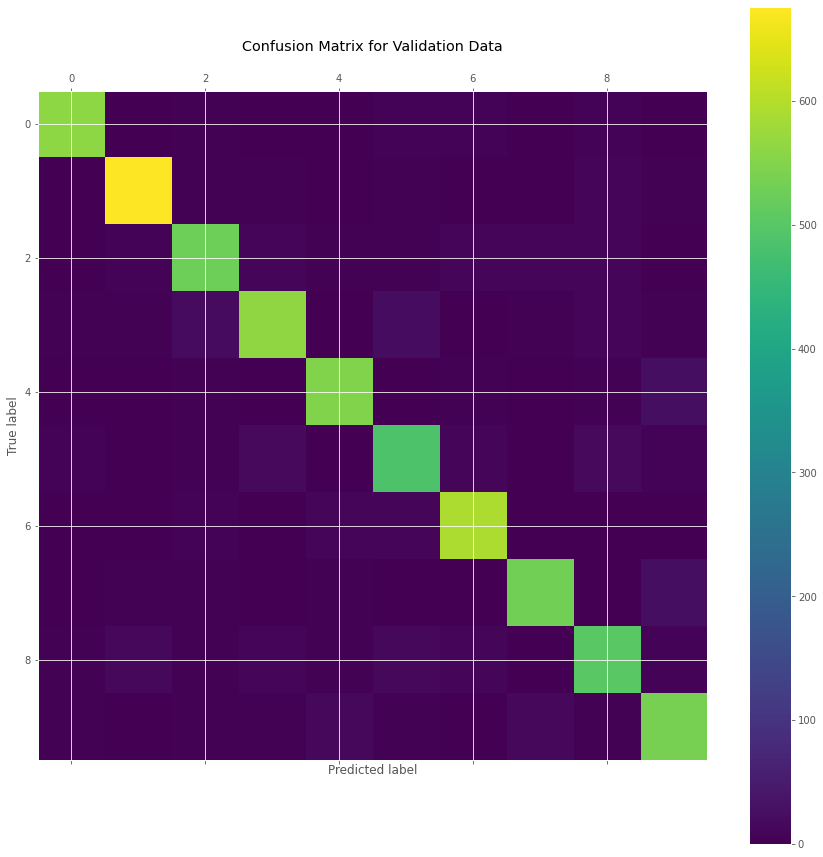

In [22]:
# Plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(lr_validation_conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Prediction on Test Set

In [23]:
# Making Prediction
lr_test_pred_labels = lrclf.predict(test_img)

# Calculating Score
lr_test_accuracy = accuracy_score(test_labels,lr_test_pred_labels)

# Precision Score
lr_test_precision_score = precision_score(test_labels, lr_test_pred_labels, average='macro')

# Recall Score
lr_test_recall_score = recall_score(test_labels, lr_test_pred_labels , average='macro')

# Confusion Matrix
lr_test_conf_mat = confusion_matrix(test_labels,lr_test_pred_labels)

print('\nPredicted Labels for Test Images: ',lr_test_pred_labels)
print('\nAccuracy of Classifier on Test Images: ',lr_test_accuracy)
print('\nPrecision Score: ',lr_test_precision_score)
print('\nRecall Score: ',lr_test_recall_score)
print('\nConfusion Matrix for Test Data: \n',lr_test_conf_mat)



Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9237

Precision Score:  0.9227688427686447

Recall Score:  0.9223924447741257

Confusion Matrix for Test Data: 
 [[ 962    0    0    3    1    5    4    4    1    0]
 [   0 1116    4    2    0    1    3    1    8    0]
 [   5   10  926   17    9    4   12    9   37    3]
 [   4    1   20  920    1   24    3    9   21    7]
 [   2    1    6    3  909    0   10    7   10   34]
 [  11    2    1   37    8  765   15    6   37   10]
 [  10    2    7    3    9   17  906    2    2    0]
 [   2    7   21    6    6    1    0  950    3   32]
 [   8   11    8   24    8   27   10   11  860    7]
 [   8    7    0   11   22    7    0   23    8  923]]


In [24]:
print('\nAccuracy of Classifier on Test Images: ',lr_test_accuracy)
print('\nPrecision Score: ',lr_test_precision_score)
print('\nRecall Score: ',lr_test_recall_score)


Accuracy of Classifier on Test Images:  0.9237

Precision Score:  0.9227688427686447

Recall Score:  0.9223924447741257


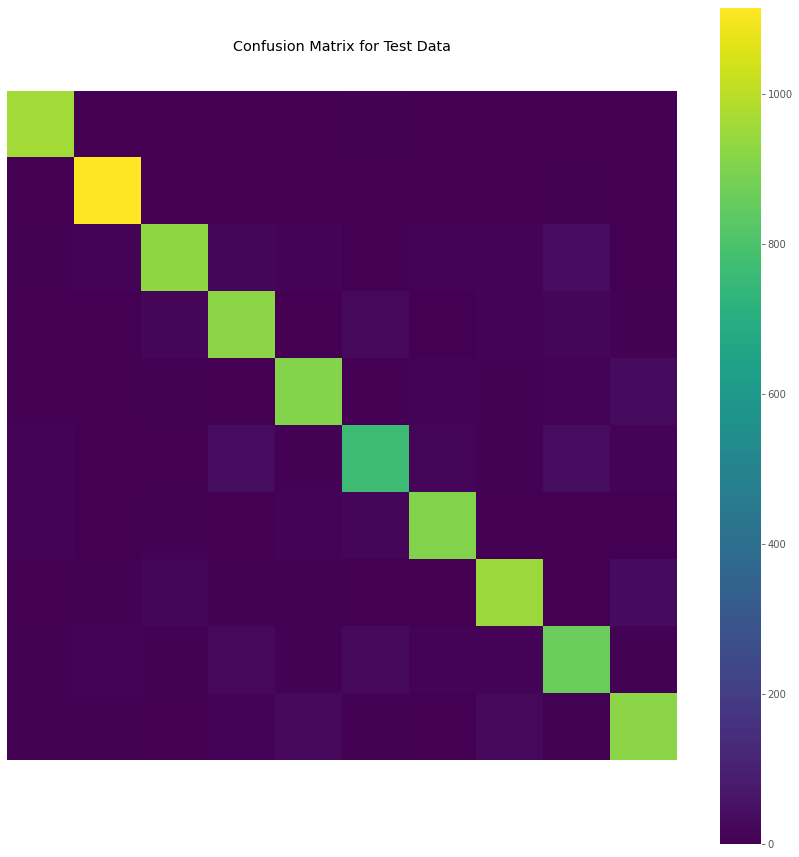

In [25]:
# Plot Confusion Matrix for Test Data
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(lr_test_conf_mat)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

## Classification Report

In [26]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_labels, lr_test_pred_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Visualizations of Prediction made

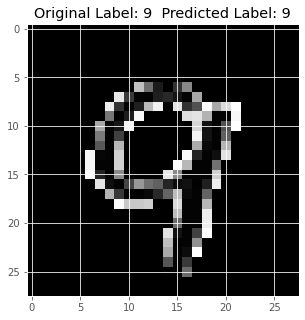

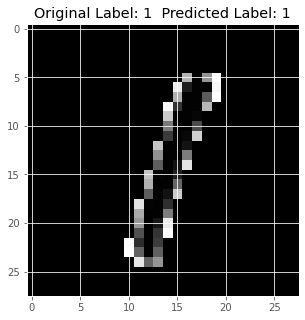

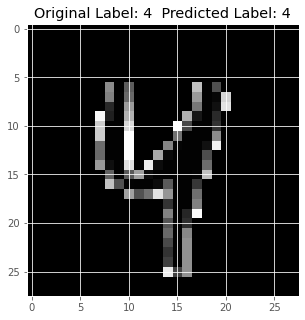

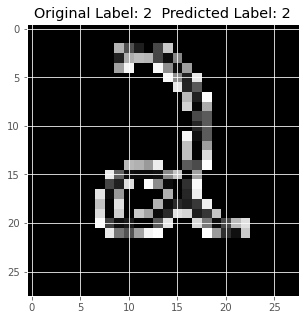

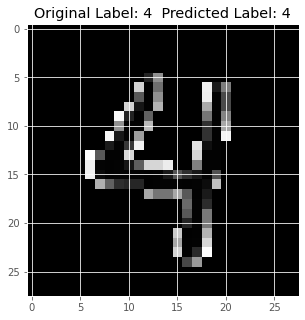

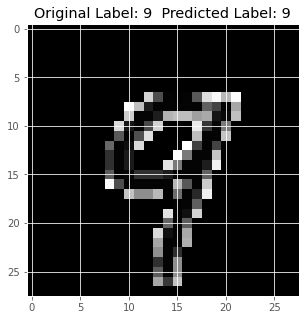

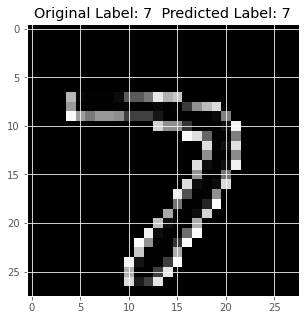

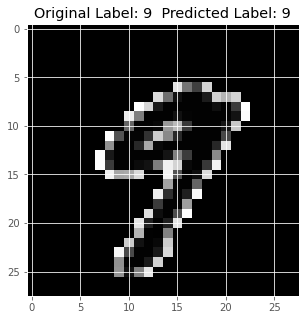

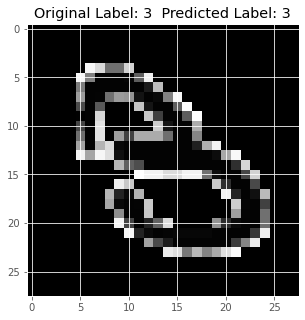

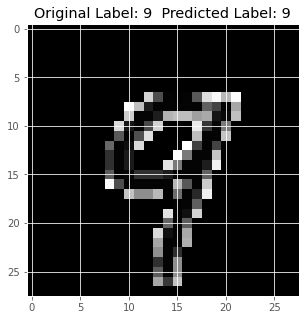

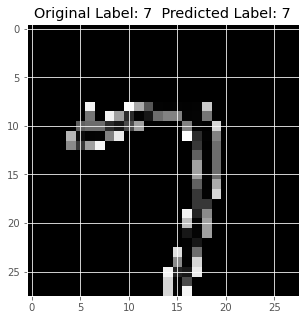

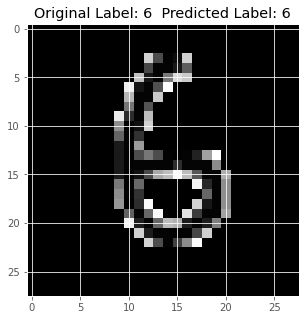

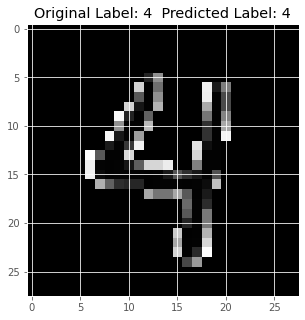

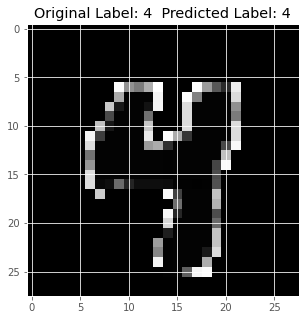

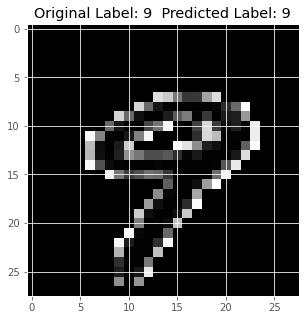

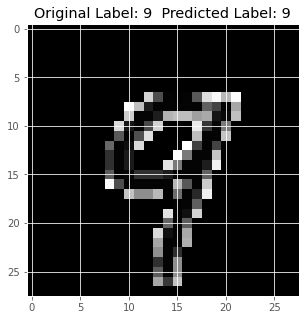

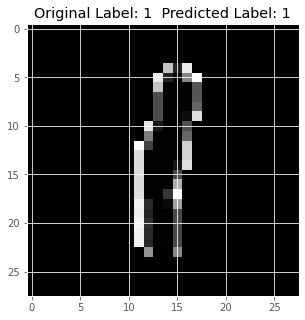

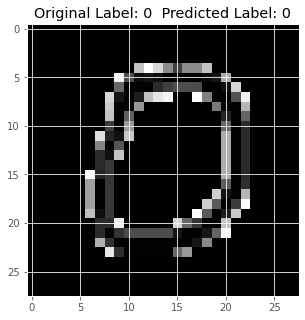

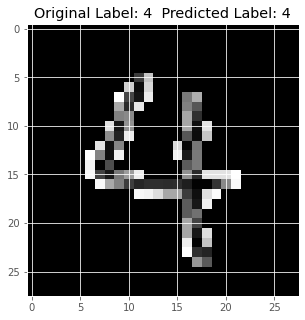

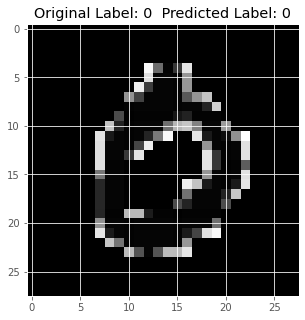

In [27]:
# Show the Test Images with Original and Predicted Labels
plt.rcParams["figure.figsize"] = (5,5)
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],lr_test_pred_labels[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()

# Support Vector Machine

## Training and Testing

In [70]:
# Support Vector Machine
# Execution time - 9 mins

print('\n----Training and Performance Metric calculation on Train and Validation Set----')

svmclf = SVC()
svmclf.fit(X_train,y_train)

#Predicting outcome
svm_validation_y_pred = svmclf.predict(X_test)

#Calculate Accuracy
svm_validation_accuracy = accuracy_score(y_test, svm_validation_y_pred)

#Precision Score
svm_validation_precision_score = precision_score(y_test, svm_validation_y_pred, average='macro')

#Recall Score
svm_validation_recall_score = recall_score(y_test, svm_validation_y_pred, average='macro')

#Confusion Matrix
svm_validation_conf_mat = confusion_matrix(y_test,svm_validation_y_pred)

print('\nPredicted Values: ',svm_validation_y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',svm_validation_accuracy)
print('\nPrecision Score: ',svm_validation_precision_score)
print('\nRecall Score: ',svm_validation_recall_score)
print('\nConfusion Matrix: \n',svm_validation_conf_mat)



----Training and Performance Metric calculation on Train and Validation Set----

Predicted Values:  [9 6 3 ... 5 8 0]

Accuracy of Classifier on Validation Image Data:  0.9801666666666666

Precision Score:  0.9800734653877706

Recall Score:  0.9800496262598719

Confusion Matrix: 
 [[580   0   1   0   0   0   3   0   0   0]
 [  0 692   2   2   1   0   0   1   0   2]
 [  1   0 575   2   1   0   2   4   1   0]
 [  1   1   7 617   1   3   0   5   2   1]
 [  0   0   2   0 582   0   2   0   0   3]
 [  0   1   1   3   0 540   0   0   2   3]
 [  1   0   1   0   2   1 614   0   2   0]
 [  1   3   1   0   4   0   0 557   0   6]
 [  1   3   0   1   1   4   4   1 555   1]
 [  2   2   0   2   8   1   0   5   0 569]]


In [71]:
print('\nAccuracy on Validation Image Data: ',svm_validation_accuracy)
print('\nPrecision Score: ',svm_validation_precision_score)
print('\nRecall Score: ',svm_validation_recall_score)


Accuracy on Validation Image Data:  0.9801666666666666

Precision Score:  0.9800734653877706

Recall Score:  0.9800496262598719


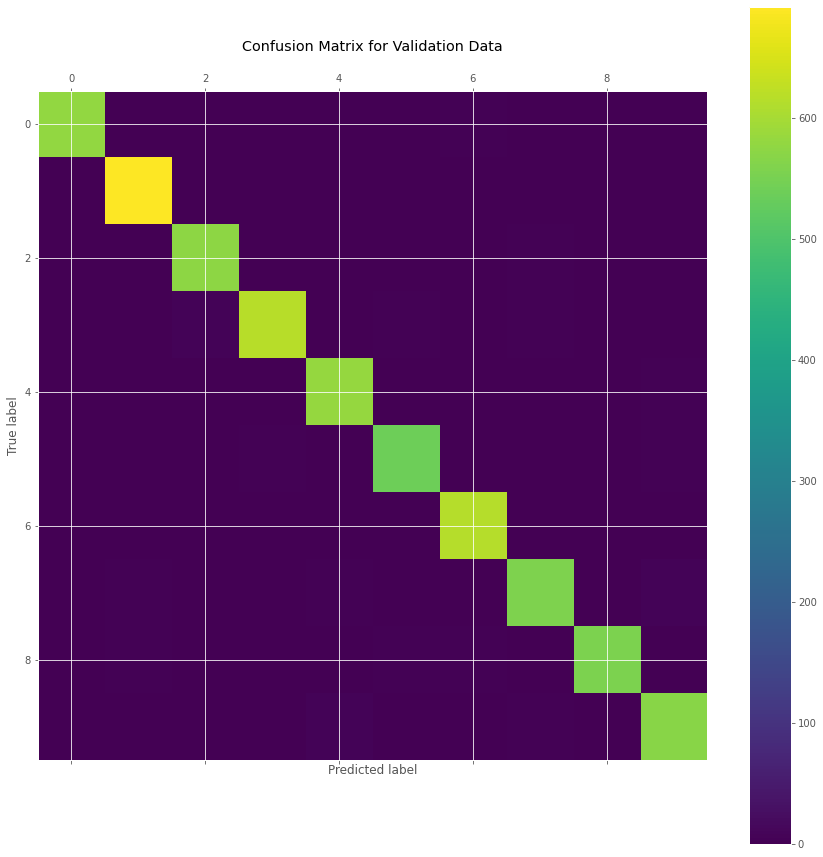

In [72]:
# Plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(svm_validation_conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Prediction on Test Set

In [73]:
# Execution time - 2 mins

# Making Prediction
svm_test_pred_labels = svmclf.predict(test_img)

# Calculating Score
svm_test_accuracy = accuracy_score(test_labels,svm_test_pred_labels)

# Precision Score
svm_test_precision_score = precision_score(test_labels, svm_test_pred_labels, average='macro')

# Recall Score
svm_test_recall_score = recall_score(test_labels, svm_test_pred_labels , average='macro')

# Confusion Matrix
svm_test_conf_mat = confusion_matrix(test_labels,svm_test_pred_labels)

print('\nPredicted Labels for Test Images: ',svm_test_pred_labels)
print('\nAccuracy of Classifier on Test Images: ',svm_test_accuracy)
print('\nPrecision Score: ',svm_test_precision_score)
print('\nRecall Score: ',svm_test_recall_score)
print('\nConfusion Matrix for Test Data: \n',svm_test_conf_mat)



Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9787

Precision Score:  0.9786800520793604

Recall Score:  0.9785776106282755

Confusion Matrix for Test Data: 
 [[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   5    1 1008    2    1    0    1    8    6    0]
 [   0    0    3  993    0    3    0    6    5    0]
 [   0    0    5    0  961    0    2    0    2   12]
 [   2    0    0    9    0  870    5    1    3    2]
 [   6    2    0    0    2    4  943    0    1    0]
 [   0    7   11    1    1    0    0  994    2   12]
 [   3    0    2    5    3    3    2    3  950    3]
 [   3    4    1    7   10    2    1    7    5  969]]


In [74]:
print('\nAccuracy of Classifier on Test Images: ',svm_test_accuracy)
print('\nPrecision Score: ',svm_test_precision_score)
print('\nRecall Score: ',svm_test_recall_score)


Accuracy of Classifier on Test Images:  0.9787

Precision Score:  0.9786800520793604

Recall Score:  0.9785776106282755


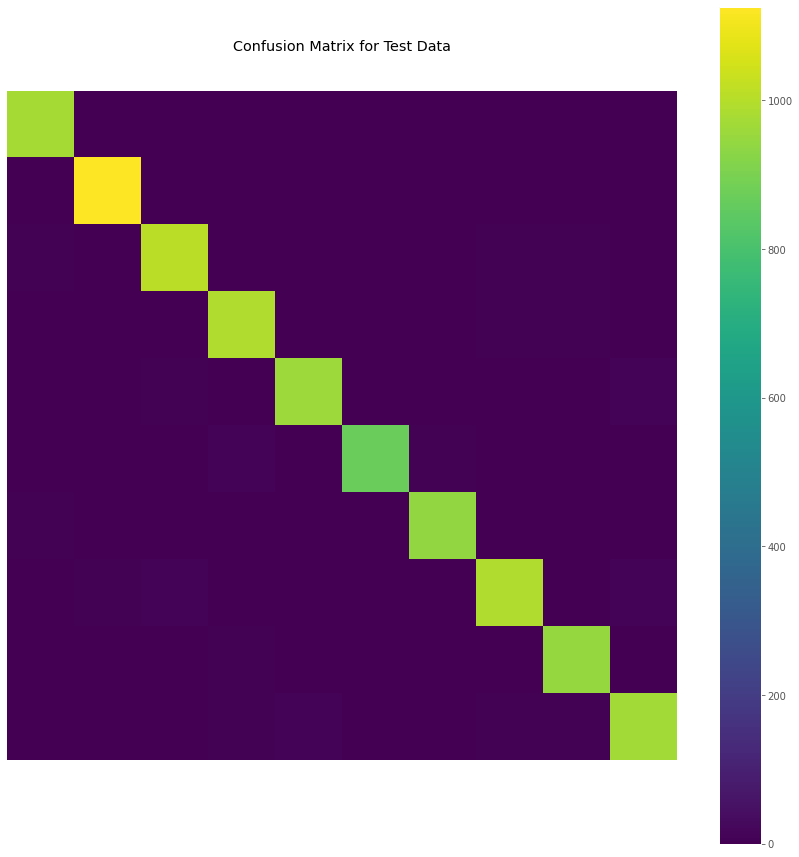

In [75]:
# Plot Confusion Matrix for Test Data
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(svm_test_conf_mat)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

## Classification Report

In [76]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_labels, svm_test_pred_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Visualizations of Prediction made

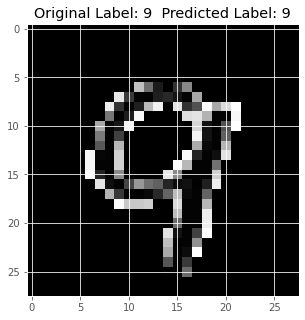

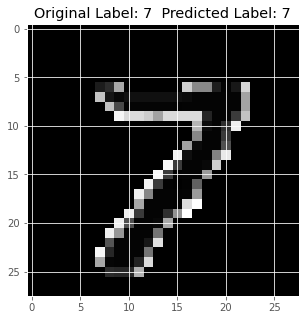

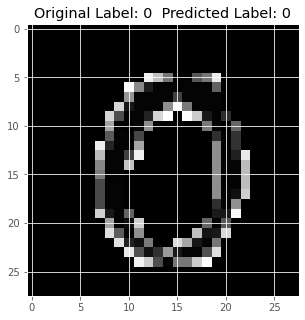

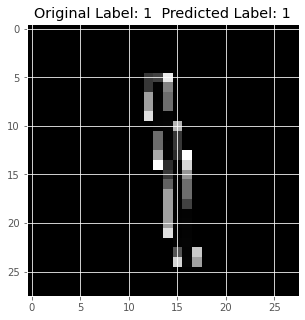

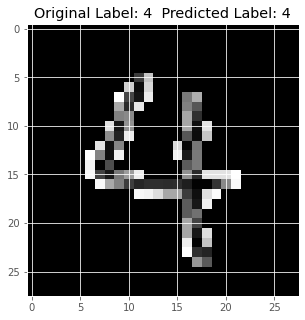

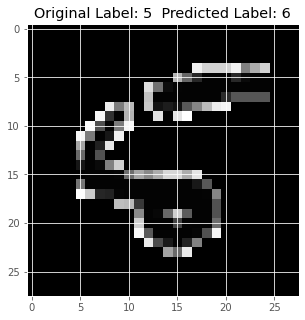

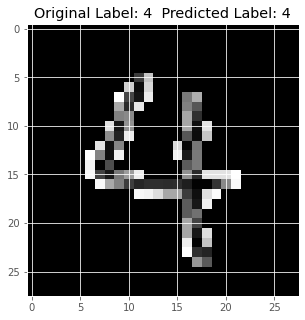

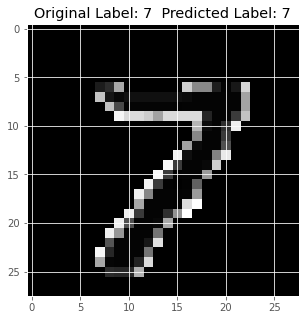

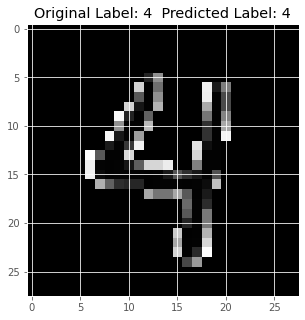

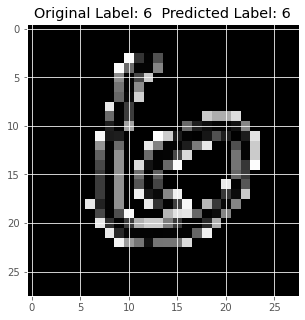

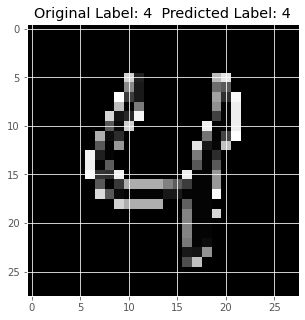

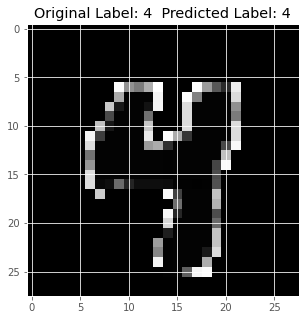

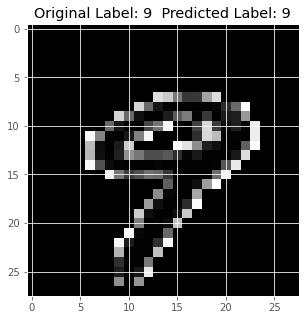

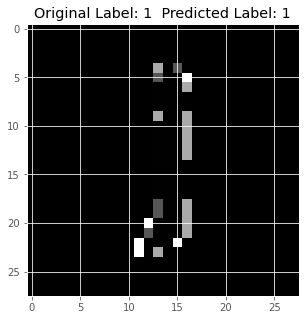

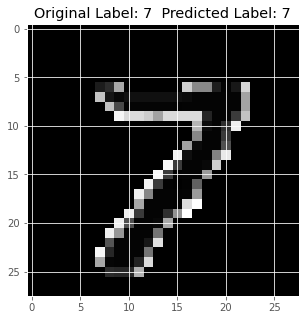

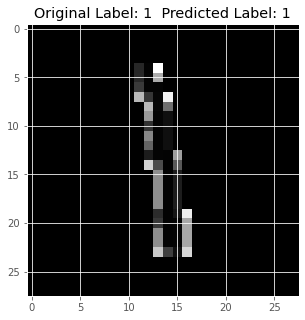

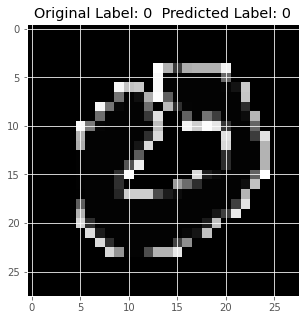

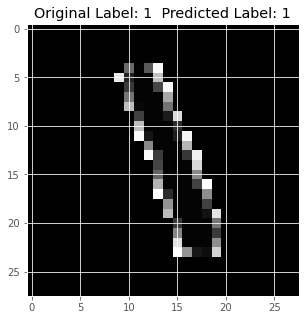

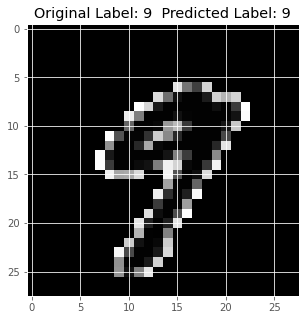

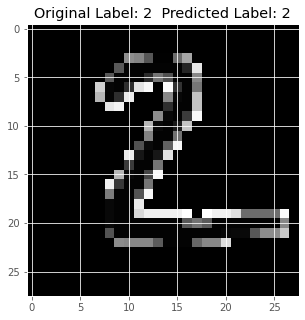

In [77]:
# Show the Test Images with Original and Predicted Labels
plt.rcParams["figure.figsize"] = (5,5)
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],svm_test_pred_labels[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()

# Naive Bayes

## Training and Testing

In [28]:
# Naive Bayes
# Execution time - 1 s

print('\n----Training and Performance Metric calculation on Train and Validation Set----')

gnbclf = GaussianNB()
gnbclf.fit(X_train,y_train)

#Predicting outcome
gnb_validation_y_pred = gnbclf.predict(X_test)

#Calculate Accuracy
gnb_validation_accuracy = accuracy_score(y_test, gnb_validation_y_pred)

#Precision Score
gnb_validation_precision_score = precision_score(y_test, gnb_validation_y_pred, average='macro')

#Recall Score
gnb_validation_recall_score = recall_score(y_test, gnb_validation_y_pred, average='macro')

#Confusion Matrix
gnb_validation_conf_mat = confusion_matrix(y_test,gnb_validation_y_pred)

print('\nPredicted Values: ',gnb_validation_y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',gnb_validation_accuracy)
print('\nPrecision Score: ',gnb_validation_precision_score)
print('\nRecall Score: ',gnb_validation_recall_score)
print('\nConfusion Matrix: \n',gnb_validation_conf_mat)



----Training and Performance Metric calculation on Train and Validation Set----

Predicted Values:  [9 6 9 ... 6 8 0]

Accuracy of Classifier on Validation Image Data:  0.5711666666666667

Precision Score:  0.684781162679055

Recall Score:  0.5600756310299099

Confusion Matrix: 
 [[521   0   6   1   0   0  18   1  28   9]
 [  0 651   2   4   1   0   9   0  22  11]
 [ 40  23 172  70   1   5 132   4 134   5]
 [ 33  28   8 248   2   1  22   8 220  68]
 [ 14   3   6   2 107   4  52   0 115 286]
 [ 51   9   2  14   5  32  33   1 347  56]
 [  6   2   1   1   0   1 592   0  16   2]
 [  1   6   0   4   4   2   2 195  10 348]
 [  8  90   5   3   2   6   9   1 356  91]
 [  4   1   2   0   4   0   0   8  17 553]]


In [29]:
print('\nAccuracy on Validation Image Data: ',gnb_validation_accuracy)
print('\nPrecision Score: ',gnb_validation_precision_score)
print('\nRecall Score: ',gnb_validation_recall_score)


Accuracy on Validation Image Data:  0.5711666666666667

Precision Score:  0.684781162679055

Recall Score:  0.5600756310299099


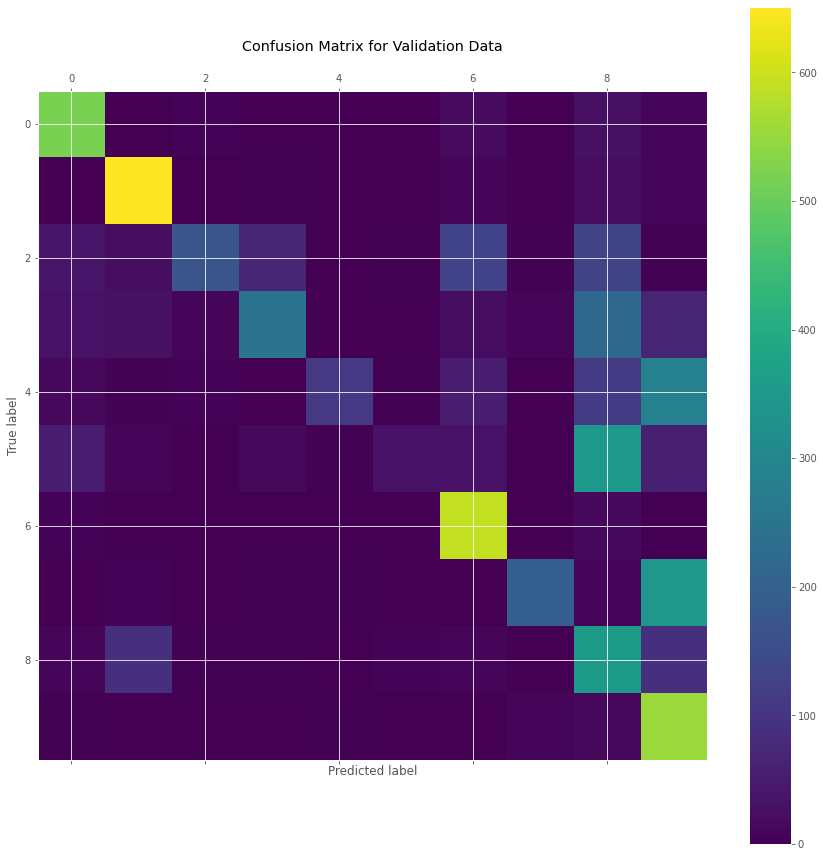

In [30]:
# Plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(gnb_validation_conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Prediction on Test Set

In [31]:
# Making Prediction
gnb_test_pred_labels = gnbclf.predict(test_img)

# Calculating Score
gnb_test_accuracy = accuracy_score(test_labels,gnb_test_pred_labels)

# Precision Score
gnb_test_precision_score = precision_score(test_labels, gnb_test_pred_labels, average='macro')

# Recall Score
gnb_test_recall_score = recall_score(test_labels, gnb_test_pred_labels , average='macro')

# Confusion Matrix
gnb_test_conf_mat = confusion_matrix(test_labels,gnb_test_pred_labels)

print('\nPredicted Labels for Test Images: ',gnb_test_pred_labels)
print('\nAccuracy of Classifier on Test Images: ',gnb_test_accuracy)
print('\nPrecision Score: ',gnb_test_precision_score)
print('\nRecall Score: ',gnb_test_recall_score)
print('\nConfusion Matrix for Test Data: \n',gnb_test_conf_mat)



Predicted Labels for Test Images:  [9 2 1 ... 9 8 6]

Accuracy of Classifier on Test Images:  0.5632

Precision Score:  0.6907307986074598

Recall Score:  0.5556248038230227

Confusion Matrix for Test Data: 
 [[ 877    1    3    6    2    5   30    1   30   25]
 [   0 1088    2    1    0    0   10    0   30    4]
 [  79   28  282   96    5    0  260    4  259   19]
 [  31   39    6  395    1    3   48    8  371  108]
 [  21    2    5    4  176    6   63    7  205  493]
 [  79   26    1   24    4   42   40    2  576   98]
 [  14   12    3    1    1    5  895    0   26    1]
 [   0   15    2   11    5    1    5  285   38  666]
 [  13   78    3    7    4   11   14    3  641  200]
 [   5    9    3    7    1    0    1   13   19  951]]


In [32]:
print('\nAccuracy of Classifier on Test Images: ',gnb_test_accuracy)
print('\nPrecision Score: ',gnb_test_precision_score)
print('\nRecall Score: ',gnb_test_recall_score)


Accuracy of Classifier on Test Images:  0.5632

Precision Score:  0.6907307986074598

Recall Score:  0.5556248038230227


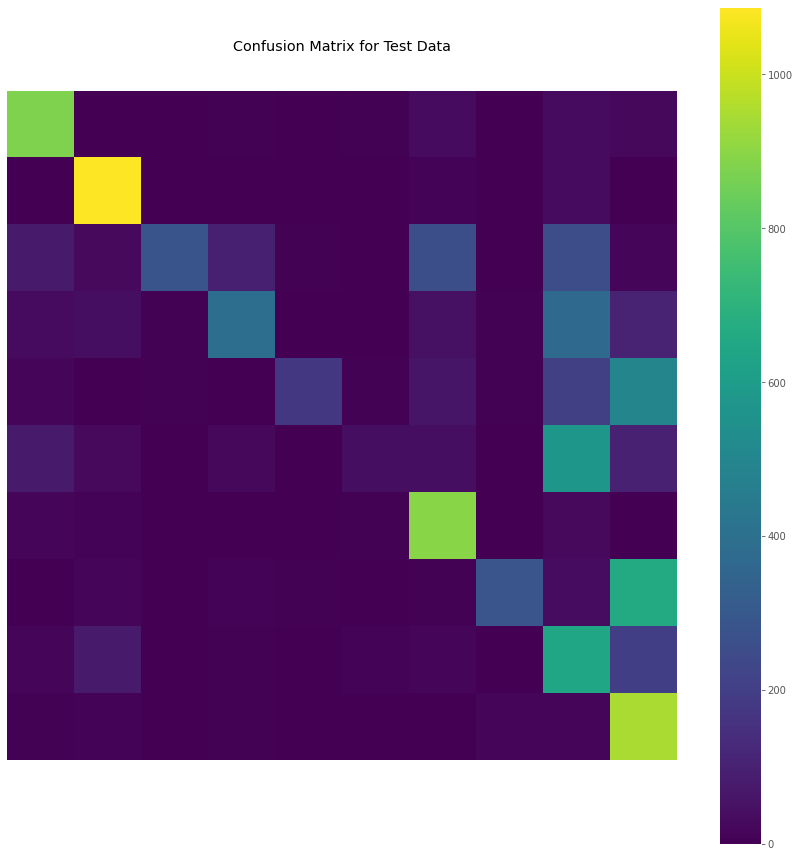

In [33]:
# Plot Confusion Matrix for Test Data
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(gnb_test_conf_mat)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

## Classification Report

In [34]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_labels, gnb_test_pred_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       0.78      0.89      0.84       980
           1       0.84      0.96      0.89      1135
           2       0.91      0.27      0.42      1032
           3       0.72      0.39      0.51      1010
           4       0.88      0.18      0.30       982
           5       0.58      0.05      0.09       892
           6       0.66      0.93      0.77       958
           7       0.88      0.28      0.42      1028
           8       0.29      0.66      0.40       974
           9       0.37      0.94      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.56      0.52     10000
weighted avg       0.70      0.56      0.53     10000



## Visualizations of Prediction made

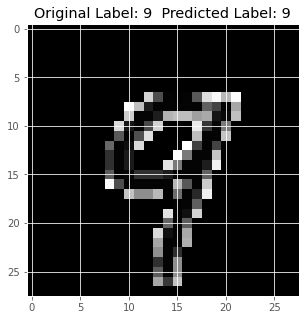

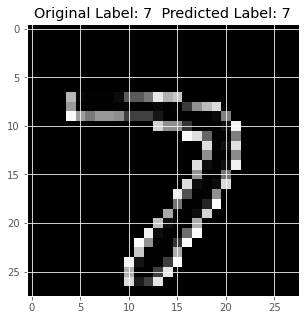

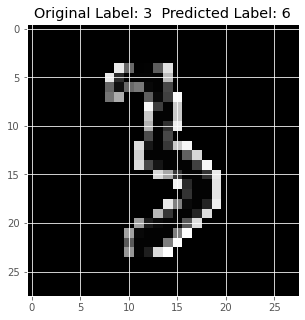

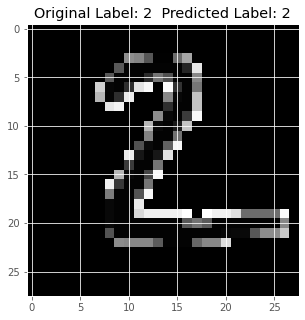

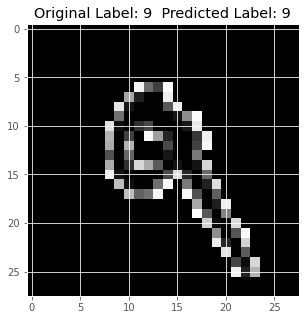

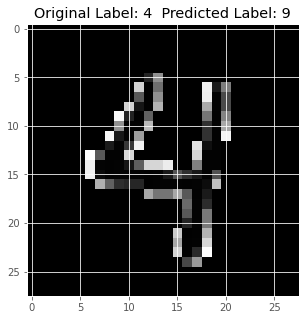

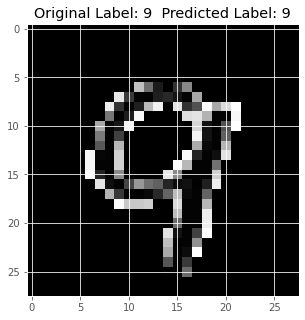

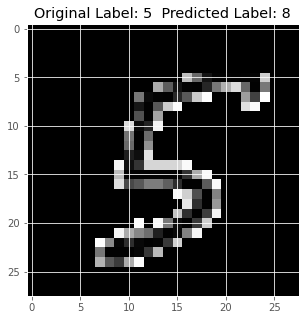

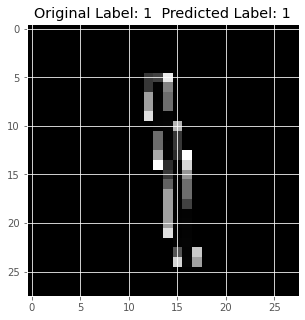

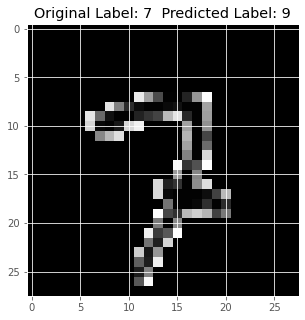

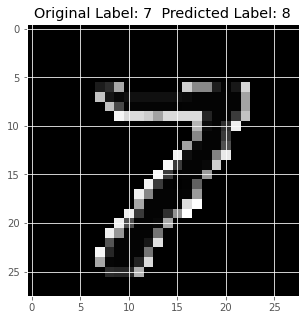

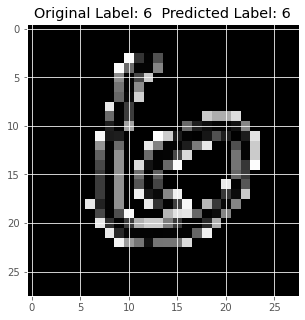

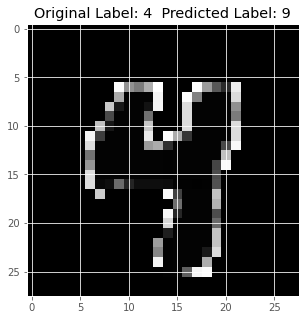

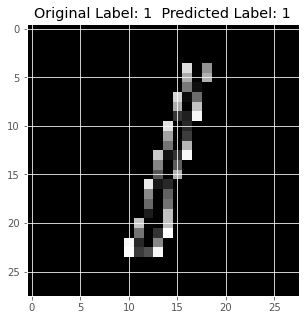

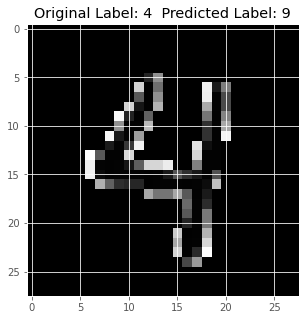

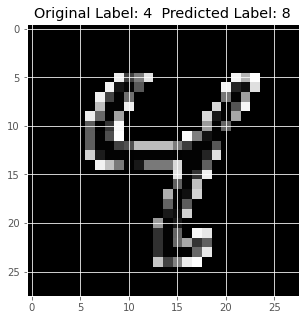

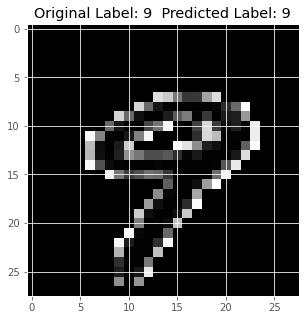

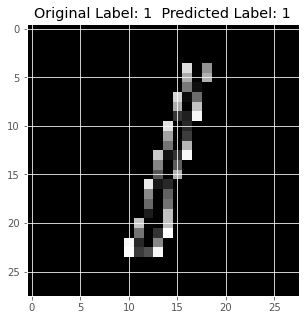

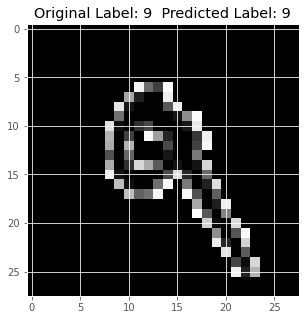

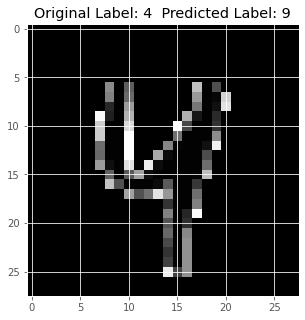

In [35]:
# Show the Test Images with Original and Predicted Labels
plt.rcParams["figure.figsize"] = (5,5)
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],gnb_test_pred_labels[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()

# K Nearest Neighbour

## Training and Testing

In [36]:
# K Nearest Neighbour
# Execution time - 9 mins

print('\n----Training and Performance Metric calculation on Train and Validation Set----')

knnclf = KNeighborsClassifier()
knnclf.fit(X_train,y_train)

#Predicting outcome
knn_validation_y_pred = knnclf.predict(X_test)

#Calculate Accuracy
knn_validation_accuracy = accuracy_score(y_test, knn_validation_y_pred)

#Precision Score
knn_validation_precision_score = precision_score(y_test, knn_validation_y_pred, average='macro')

#Recall Score
knn_validation_recall_score = recall_score(y_test, knn_validation_y_pred, average='macro')

#Confusion Matrix
knn_validation_conf_mat = confusion_matrix(y_test,knn_validation_y_pred)

print('\nPredicted Values: ',knn_validation_y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',knn_validation_accuracy)
print('\nPrecision Score: ',knn_validation_precision_score)
print('\nRecall Score: ',knn_validation_recall_score)
print('\nConfusion Matrix: \n',knn_validation_conf_mat)



----Training and Performance Metric calculation on Train and Validation Set----

Predicted Values:  [9 6 3 ... 5 8 0]

Accuracy of Classifier on Validation Image Data:  0.9701666666666666

Precision Score:  0.9705048550644643

Recall Score:  0.9695570502869261

Confusion Matrix: 
 [[583   0   0   0   0   0   1   0   0   0]
 [  0 696   0   0   1   0   0   3   0   0]
 [  4   5 564   1   0   0   1  10   1   0]
 [  0   1   5 615   1   5   1   5   2   3]
 [  1   5   0   0 569   0   2   1   0  11]
 [  2   1   0   4   0 535   2   1   2   3]
 [  3   1   0   0   1   4 612   0   0   0]
 [  1   8   1   0   1   0   0 556   0   5]
 [  2   9   4   4   3  18   1   3 523   4]
 [  1   2   0   3   7   0   1   7   0 568]]


In [37]:
print('\nAccuracy on Validation Image Data: ',knn_validation_accuracy)
print('\nPrecision Score: ',knn_validation_precision_score)
print('\nRecall Score: ',knn_validation_recall_score)


Accuracy on Validation Image Data:  0.9701666666666666

Precision Score:  0.9705048550644643

Recall Score:  0.9695570502869261


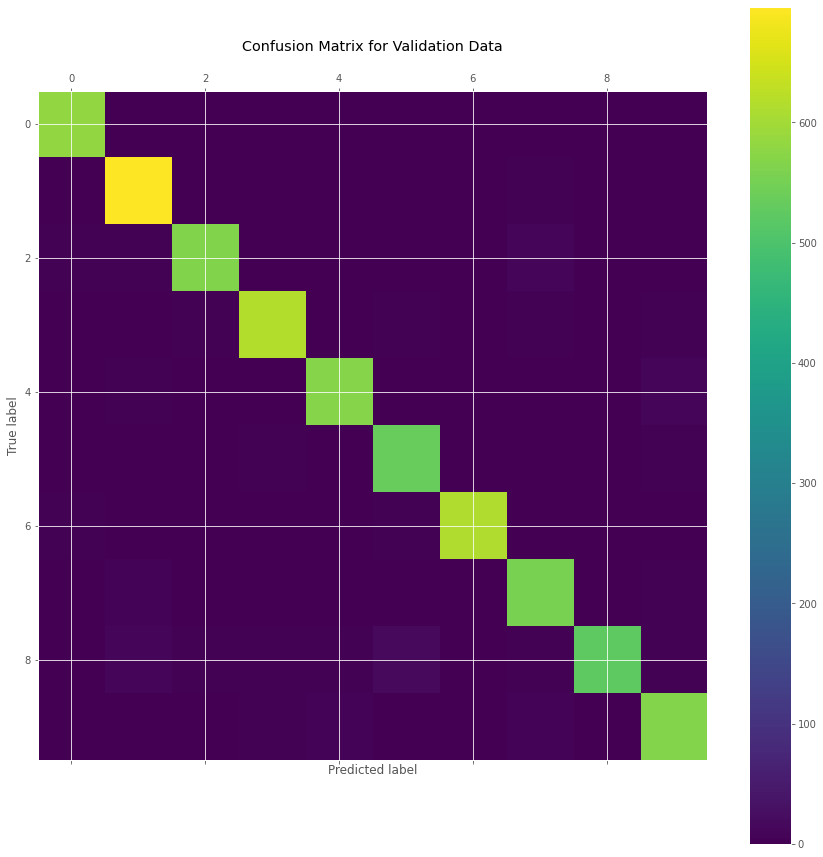

In [38]:
# Plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(knn_validation_conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Prediction on Test Set

In [39]:
# Execution time - 14 mins

# Making Prediction
knn_test_pred_labels = knnclf.predict(test_img)

# Calculating Score
knn_test_accuracy = accuracy_score(test_labels,knn_test_pred_labels)

# Precision Score
knn_test_precision_score = precision_score(test_labels, knn_test_pred_labels, average='macro')

# Recall Score
knn_test_recall_score = recall_score(test_labels, knn_test_pred_labels , average='macro')

# Confusion Matrix
knn_test_conf_mat = confusion_matrix(test_labels,knn_test_pred_labels)

print('\nPredicted Labels for Test Images: ',knn_test_pred_labels)
print('\nAccuracy of Classifier on Test Images: ',knn_test_accuracy)
print('\nPrecision Score: ',knn_test_precision_score)
print('\nRecall Score: ',knn_test_recall_score)
print('\nConfusion Matrix for Test Data: \n',knn_test_conf_mat)



Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9673

Precision Score:  0.9677639860341742

Recall Score:  0.9669372821676335

Confusion Matrix for Test Data: 
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  11    8  991    2    0    0    2   15    3    0]
 [   0    3    3  975    1   13    1    6    5    3]
 [   3    8    0    0  943    0    4    2    1   21]
 [   5    0    0   14    2  859    6    1    2    3]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   24    3    0    3    0    0  987    0   11]
 [   9    3    6   14    7   13    6    5  908    3]
 [   5    7    3    9   10    3    1   10    2  959]]


In [40]:
print('\nAccuracy of Classifier on Test Images: ',knn_test_accuracy)
print('\nPrecision Score: ',knn_test_precision_score)
print('\nRecall Score: ',knn_test_recall_score)


Accuracy of Classifier on Test Images:  0.9673

Precision Score:  0.9677639860341742

Recall Score:  0.9669372821676335


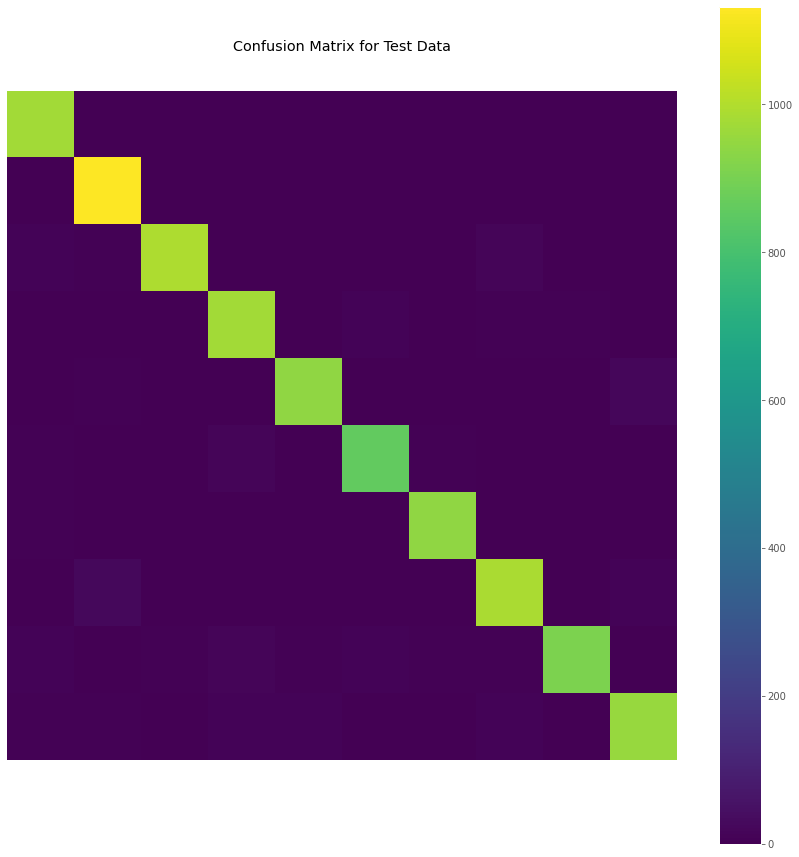

In [41]:
# Plot Confusion Matrix for Test Data
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(knn_test_conf_mat)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

## Classification Report

In [42]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_labels, knn_test_pred_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Visualizations of Prediction made

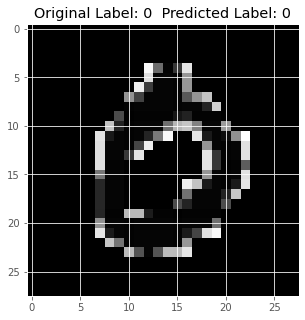

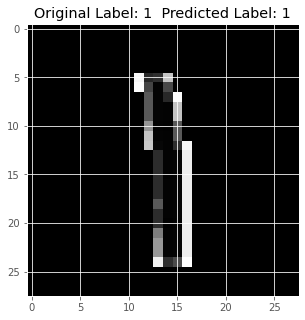

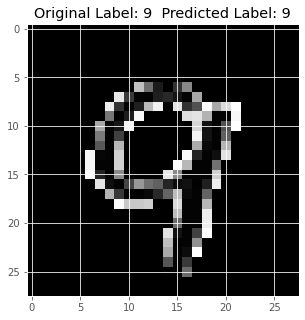

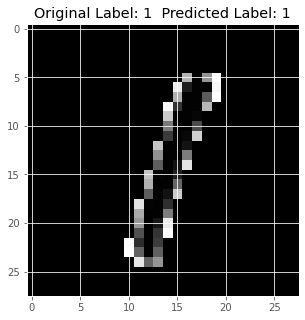

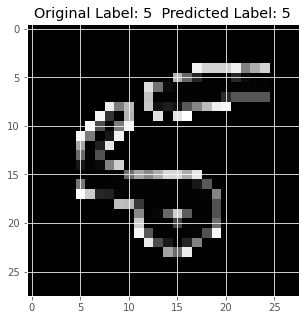

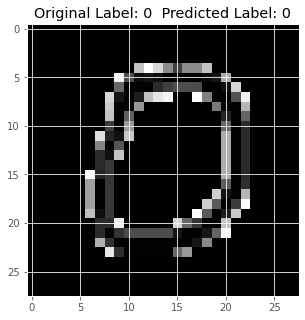

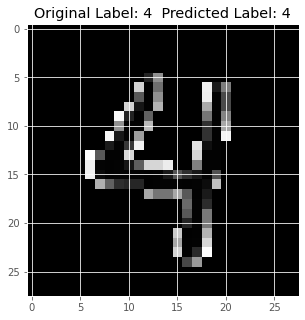

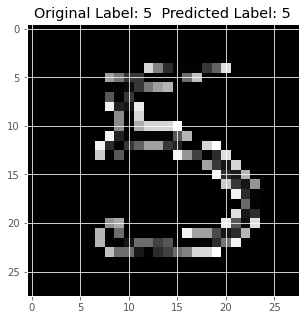

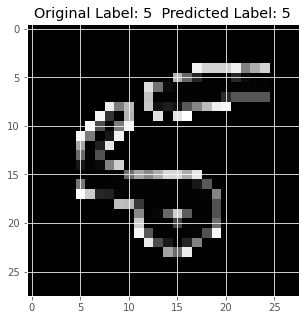

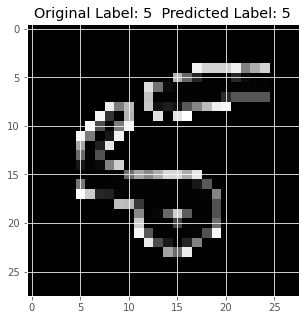

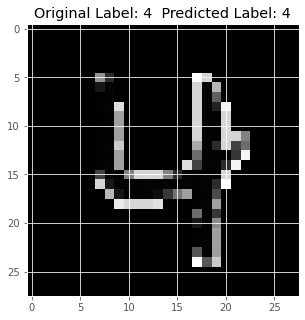

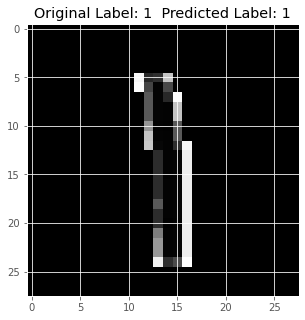

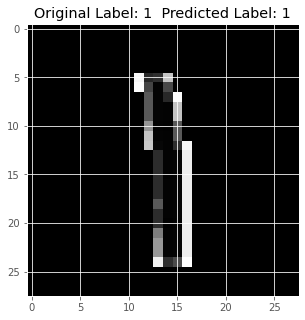

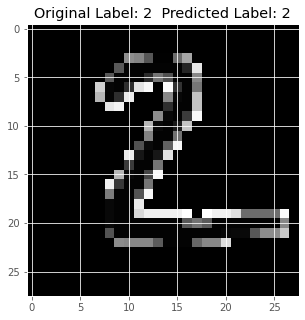

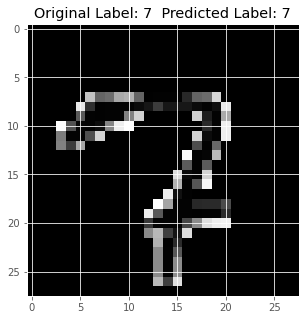

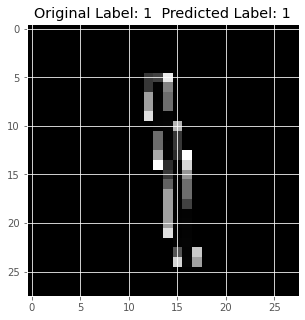

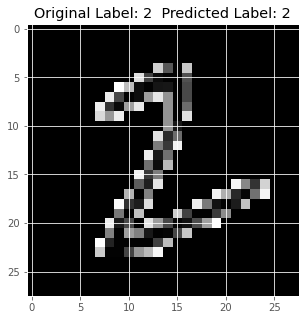

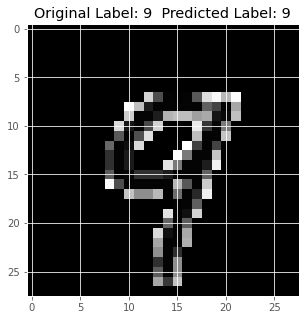

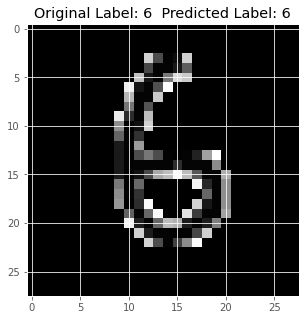

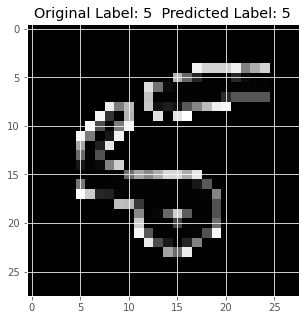

In [43]:
# Show the Test Images with Original and Predicted Labels
plt.rcParams["figure.figsize"] = (5,5)
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],knn_test_pred_labels[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()

# Random Forest Classifier

## Training and Testing

In [44]:
# Random Forest Classifier
# Execution time - 45 s

print('\n----Training and Performance Metric calculation on Train and Validation Set----')

rfcclf = RandomForestClassifier()
rfcclf.fit(X_train,y_train)

#Predicting outcome
rfc_validation_y_pred = rfcclf.predict(X_test)

#Calculate Accuracy
rfc_validation_accuracy = accuracy_score(y_test, rfc_validation_y_pred)

#Precision Score
rfc_validation_precision_score = precision_score(y_test, rfc_validation_y_pred, average='macro')

#Recall Score
rfc_validation_recall_score = recall_score(y_test, rfc_validation_y_pred, average='macro')

#Confusion Matrix
rfc_validation_conf_mat = confusion_matrix(y_test,rfc_validation_y_pred)

print('\nPredicted Values: ',rfc_validation_y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',rfc_validation_accuracy)
print('\nPrecision Score: ',rfc_validation_precision_score)
print('\nRecall Score: ',rfc_validation_recall_score)
print('\nConfusion Matrix: \n',rfc_validation_conf_mat)



----Training and Performance Metric calculation on Train and Validation Set----

Predicted Values:  [9 6 3 ... 5 8 0]

Accuracy of Classifier on Validation Image Data:  0.9691666666666666

Precision Score:  0.9687536275467232

Recall Score:  0.9689906718443261

Confusion Matrix: 
 [[578   0   1   0   0   0   1   0   4   0]
 [  0 686   5   0   1   1   1   3   1   2]
 [  4   0 570   0   0   0   4   5   3   0]
 [  0   0   8 607   1   5   2   7   3   5]
 [  1   0   0   0 575   0   2   0   0  11]
 [  1   1   2   6   1 529   0   0   3   7]
 [  3   0   1   0   1   7 608   0   1   0]
 [  1   2   3   0   4   0   0 555   1   6]
 [  0   4   1   2   2   7   3   0 546   6]
 [  5   3   1   3   9   0   1   3   3 561]]


In [45]:
print('\nAccuracy on Validation Image Data: ',rfc_validation_accuracy)
print('\nPrecision Score: ',rfc_validation_precision_score)
print('\nRecall Score: ',rfc_validation_recall_score)


Accuracy on Validation Image Data:  0.9691666666666666

Precision Score:  0.9687536275467232

Recall Score:  0.9689906718443261


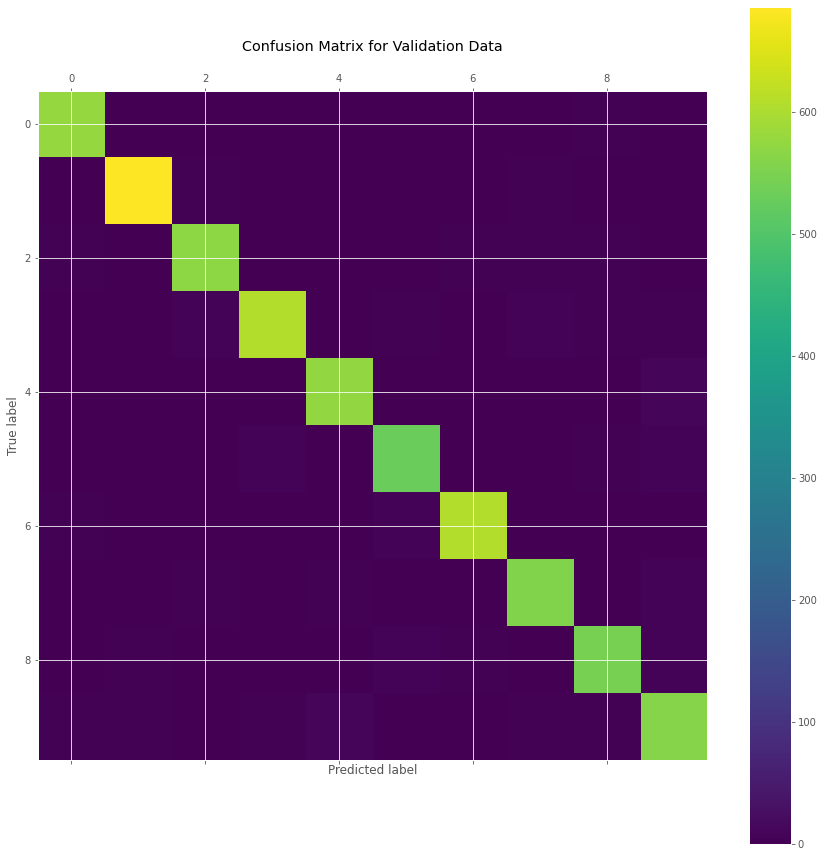

In [46]:
# Plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(rfc_validation_conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Prediction on Test Set

In [47]:
# Making Prediction
rfc_test_pred_labels = rfcclf.predict(test_img)

# Calculating Score
rfc_test_accuracy = accuracy_score(test_labels,rfc_test_pred_labels)

# Precision Score
rfc_test_precision_score = precision_score(test_labels, rfc_test_pred_labels, average='macro')

# Recall Score
rfc_test_recall_score = recall_score(test_labels, rfc_test_pred_labels , average='macro')

# Confusion Matrix
rfc_test_conf_mat = confusion_matrix(test_labels,rfc_test_pred_labels)

print('\nPredicted Labels for Test Images: ',rfc_test_pred_labels)
print('\nAccuracy of Classifier on Test Images: ',rfc_test_accuracy)
print('\nPrecision Score: ',rfc_test_precision_score)
print('\nRecall Score: ',rfc_test_recall_score)
print('\nConfusion Matrix for Test Data: \n',rfc_test_conf_mat)



Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9682

Precision Score:  0.9680303562376034

Recall Score:  0.9680378054786599

Confusion Matrix for Test Data: 
 [[ 968    0    0    1    0    2    3    1    4    1]
 [   0 1119    2    4    1    2    3    0    3    1]
 [   6    0  996    5    3    0    4   10    8    0]
 [   1    0   10  970    0    8    0    9    9    3]
 [   1    0    2    0  952    0    4    1    2   20]
 [   3    0    0    9    2  864    4    1    7    2]
 [  10    3    1    0    4    3  933    0    4    0]
 [   1    3   21    0    1    0    0  991    2    9]
 [   3    0    4    9    5    5    6    4  929    9]
 [   6    6    2   11   10    3    1    5    5  960]]


In [48]:
print('\nAccuracy of Classifier on Test Images: ',rfc_test_accuracy)
print('\nPrecision Score: ',rfc_test_precision_score)
print('\nRecall Score: ',rfc_test_recall_score)


Accuracy of Classifier on Test Images:  0.9682

Precision Score:  0.9680303562376034

Recall Score:  0.9680378054786599


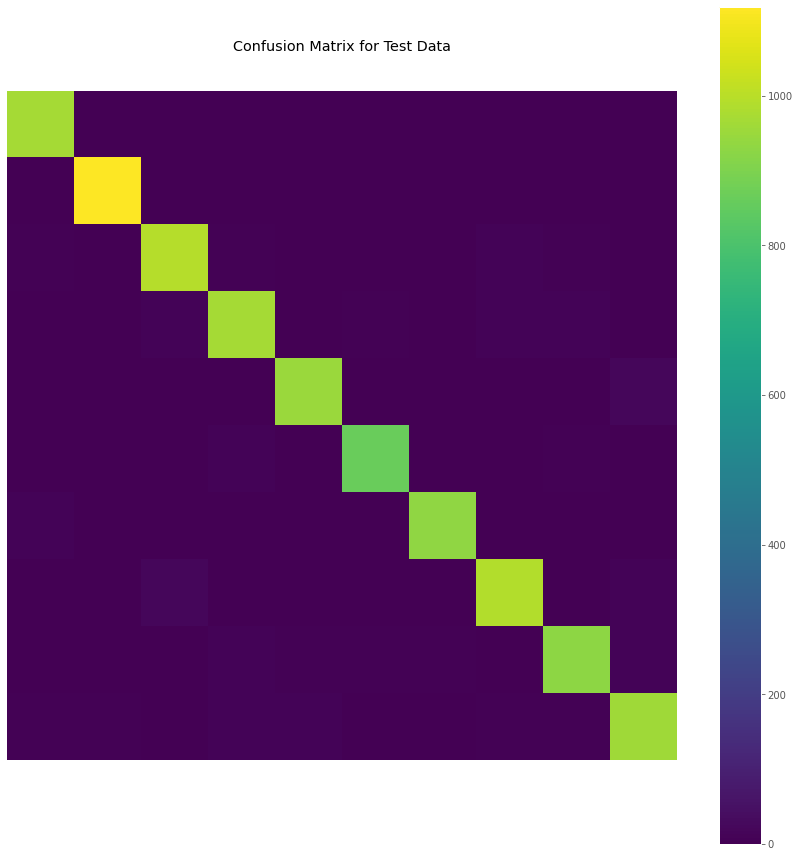

In [49]:
# Plot Confusion Matrix for Test Data
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(rfc_test_conf_mat)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

## Classification Report

In [50]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_labels, rfc_test_pred_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Visualizations of Prediction made

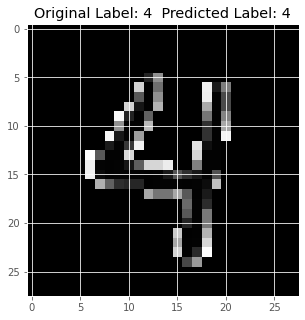

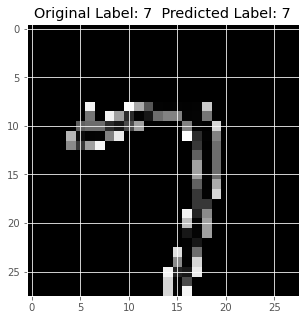

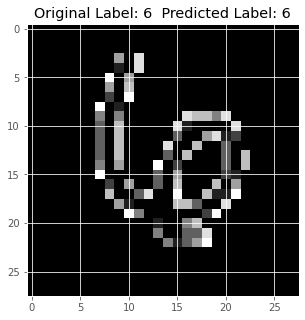

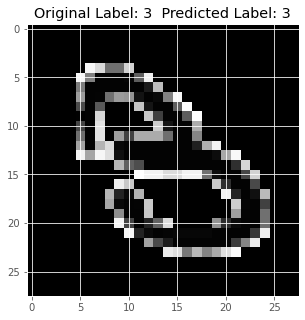

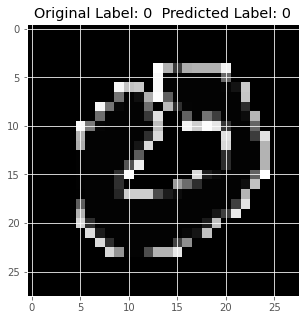

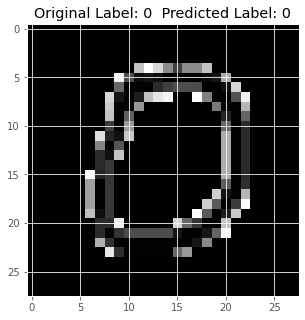

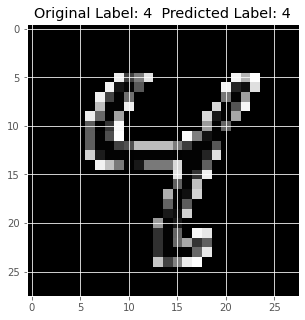

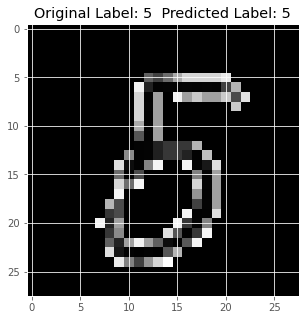

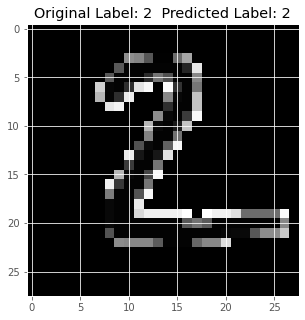

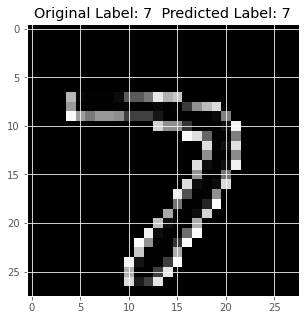

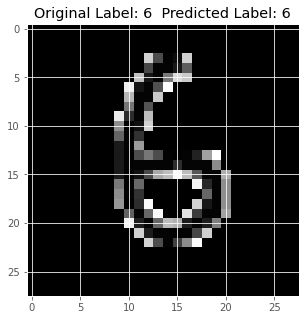

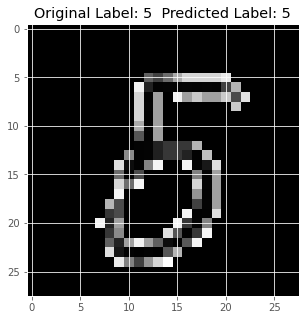

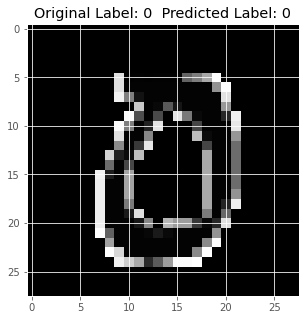

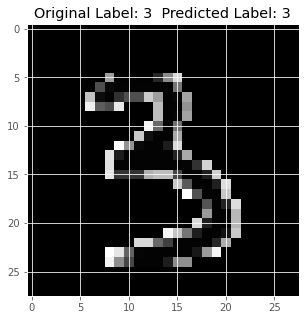

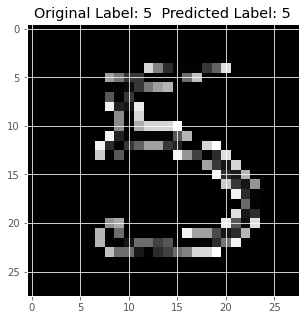

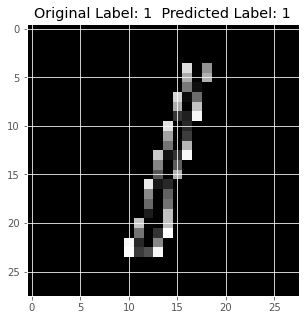

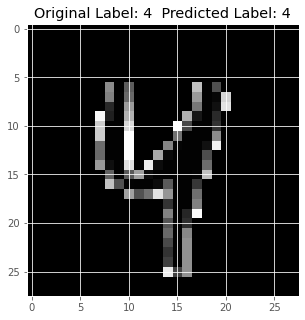

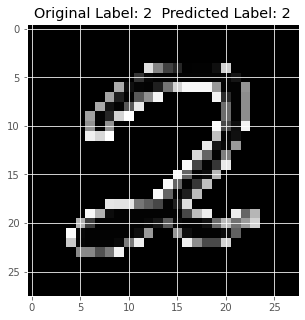

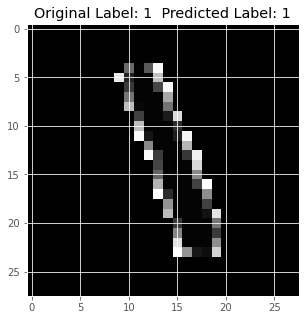

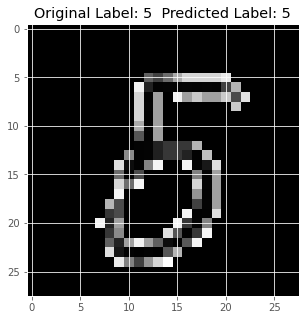

In [51]:
# Show the Test Images with Original and Predicted Labels
plt.rcParams["figure.figsize"] = (5,5)
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],rfc_test_pred_labels[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()

# Neural Networks

## Training and Testing

Train: X=(54000, 28, 28), y=(54000,)
Test: X=(6000, 28, 28), y=(6000,)


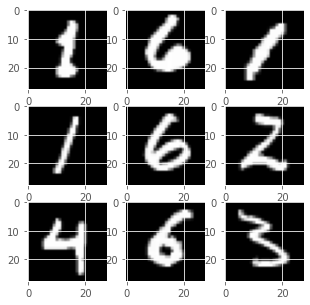

In [59]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
#(trainX, trainy), (testX, testy) = mnist.load_data()
trainX=np.reshape(X_train, (X_train.shape[0],28, 28))
testX=np.reshape(X_test, (X_test.shape[0],28, 28))
trainy=y_train
testy=y_test

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	# save model
	model.save('final_model.h5')
 
# entry point, run the test harness
run_test_harness()

In [60]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	pred=[]
	# load model
	model = load_model('final_model.h5')
	# predict the class
	predict_value = model.predict(testX)
	for i in range(predict_value.shape[0]):
		pred.append(argmax(predict_value[i]))
	#print(digit)
	return pred
 
# entry point, run the example
nn_validation_y_pred=run_example()

In [61]:
print('\n----Training and Performance Metric calculation on Train and Validation Set----')

#Calculate Accuracy
nn_validation_accuracy = accuracy_score(testy, nn_validation_y_pred)

#Precision Score
nn_validation_precision_score = precision_score(testy, nn_validation_y_pred, average='macro')

#Recall Score
nn_validation_recall_score = recall_score(testy, nn_validation_y_pred, average='macro')

#Confusion Matrix
nn_validation_conf_mat = confusion_matrix(testy,nn_validation_y_pred)

print('\nPredicted Values: ',nn_validation_y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',nn_validation_accuracy)
print('\nPrecision Score: ',nn_validation_precision_score)
print('\nRecall Score: ',nn_validation_recall_score)
print('\nConfusion Matrix: \n',nn_validation_conf_mat)


----Training and Performance Metric calculation on Train and Validation Set----

Predicted Values:  [9, 6, 3, 6, 4, 4, 0, 1, 1, 6, 5, 8, 6, 4, 1, 6, 0, 1, 7, 6, 9, 8, 5, 2, 9, 1, 7, 7, 3, 4, 6, 9, 9, 9, 2, 9, 1, 8, 4, 7, 2, 8, 0, 5, 3, 1, 4, 7, 7, 7, 7, 3, 5, 9, 4, 6, 3, 2, 8, 6, 6, 4, 4, 6, 6, 4, 1, 8, 7, 4, 5, 9, 4, 5, 3, 3, 1, 5, 7, 3, 9, 0, 5, 1, 9, 9, 5, 4, 8, 9, 1, 8, 4, 6, 7, 1, 1, 4, 5, 2, 3, 9, 2, 3, 4, 0, 7, 1, 0, 3, 9, 2, 9, 0, 7, 1, 3, 3, 7, 9, 0, 1, 4, 0, 4, 0, 7, 7, 5, 6, 4, 3, 4, 5, 4, 7, 9, 1, 8, 4, 1, 6, 2, 7, 3, 1, 1, 4, 4, 2, 9, 0, 1, 5, 9, 8, 8, 0, 5, 8, 1, 9, 0, 2, 1, 8, 5, 5, 1, 1, 6, 7, 8, 4, 6, 6, 9, 0, 4, 5, 4, 3, 5, 7, 1, 3, 9, 8, 9, 6, 7, 3, 3, 9, 9, 3, 2, 5, 6, 6, 5, 6, 3, 7, 3, 5, 3, 0, 4, 2, 6, 8, 2, 6, 0, 8, 0, 4, 6, 7, 8, 0, 8, 8, 8, 1, 7, 4, 7, 4, 7, 5, 2, 7, 7, 7, 5, 6, 7, 3, 9, 5, 1, 7, 6, 6, 4, 2, 7, 2, 9, 7, 9, 1, 8, 4, 0, 0, 5, 8, 5, 1, 3, 1, 1, 6, 9, 2, 4, 0, 3, 6, 7, 6, 1, 7, 6, 8, 7, 5, 2, 5, 1, 2, 4, 7, 3, 7, 0, 0, 7, 0, 1, 3, 3, 1, 0, 8, 4, 5

In [62]:
print('\nAccuracy on Validation Image Data: ',nn_validation_accuracy)
print('\nPrecision Score: ',nn_validation_precision_score)
print('\nRecall Score: ',nn_validation_recall_score)


Accuracy on Validation Image Data:  0.998

Precision Score:  0.998006700301221

Recall Score:  0.9979654214852951


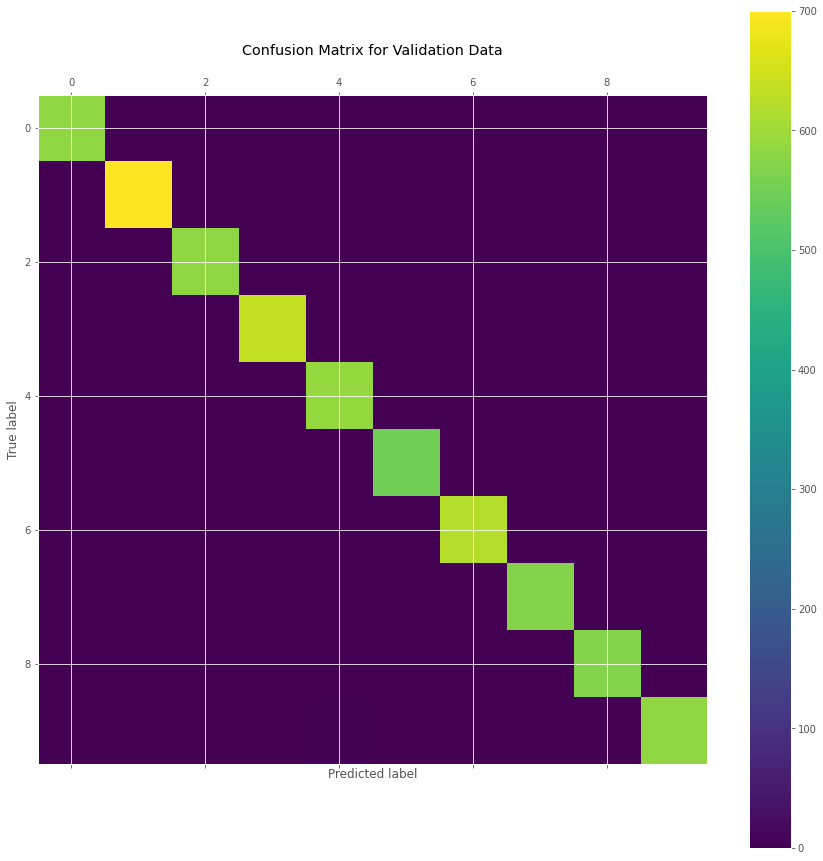

In [63]:
# Plot Confusion Matrix Data as a Matrix
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(nn_validation_conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Prediction on Test Set

In [64]:
img_test=np.reshape(test_img, (test_img.shape[0],28, 28))

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	pred=[]
	# load model
	model = load_model('final_model.h5')
	# predict the class
	predict_value = model.predict(img_test)
	for i in range(predict_value.shape[0]):
		pred.append(argmax(predict_value[i]))
	#print(digit)
	return pred
 
# entry point, run the example
nn_test_pred_labels=run_example()

In [65]:
# Calculating Score
nn_test_accuracy = accuracy_score(test_labels,nn_test_pred_labels)

# Precision Score
nn_test_precision_score = precision_score(test_labels, nn_test_pred_labels, average='macro')

# Recall Score
nn_test_recall_score = recall_score(test_labels, nn_test_pred_labels , average='macro')

# Confusion Matrix
nn_test_conf_mat = confusion_matrix(test_labels,nn_test_pred_labels)

print('\nPredicted Labels for Test Images: ',nn_test_pred_labels)
print('\nAccuracy of Classifier on Test Images: ',nn_test_accuracy)
print('\nPrecision Score: ',nn_test_precision_score)
print('\nRecall Score: ',nn_test_recall_score)
print('\nConfusion Matrix for Test Data: \n',nn_test_conf_mat)



Predicted Labels for Test Images:  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 

In [66]:
print('\nAccuracy of Classifier on Test Images: ',nn_test_accuracy)
print('\nPrecision Score: ',nn_test_precision_score)
print('\nRecall Score: ',nn_test_recall_score)


Accuracy of Classifier on Test Images:  0.9924

Precision Score:  0.9923831522767737

Recall Score:  0.992399081186095


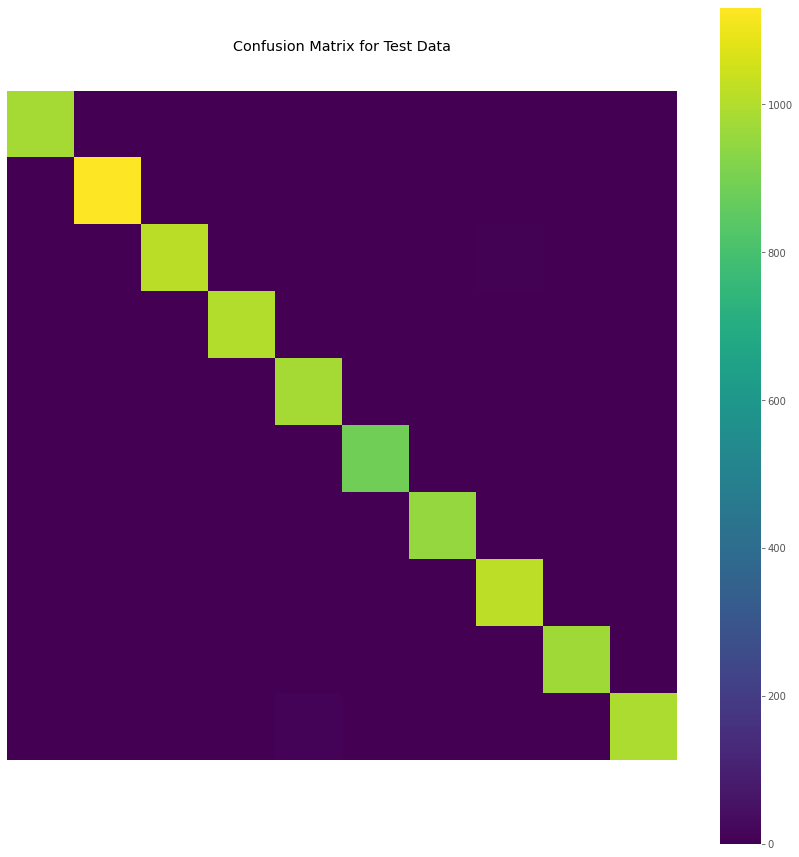

In [67]:
# Plot Confusion Matrix for Test Data
plt.rcParams["figure.figsize"] = (15, 15)
plt.matshow(nn_test_conf_mat)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

## Classification Report

In [68]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(test_labels, nn_test_pred_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Visualizations of Prediction made

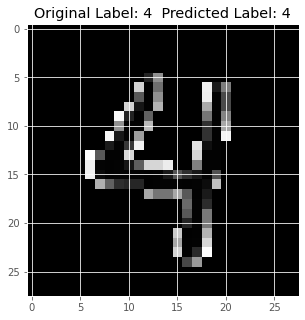

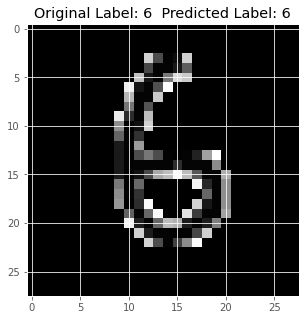

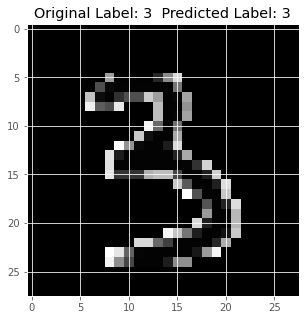

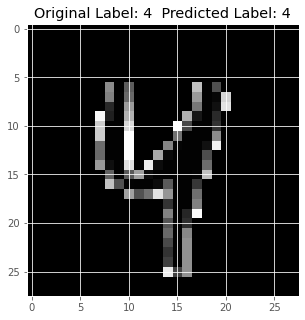

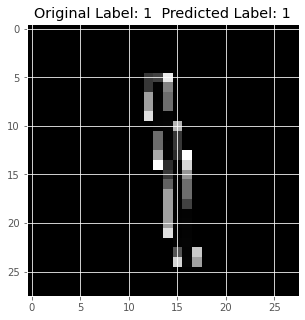

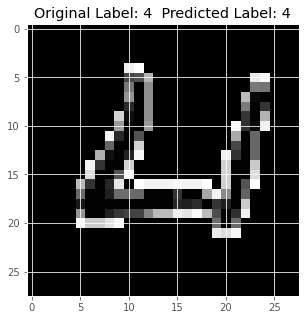

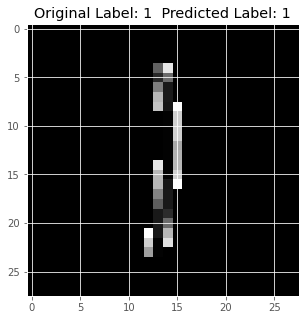

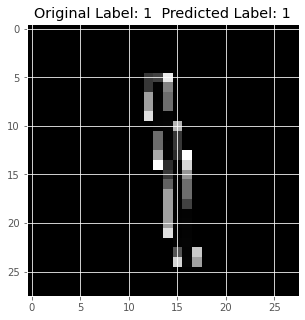

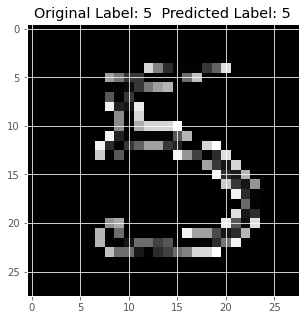

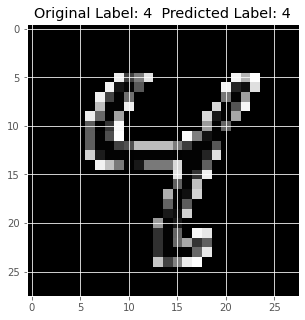

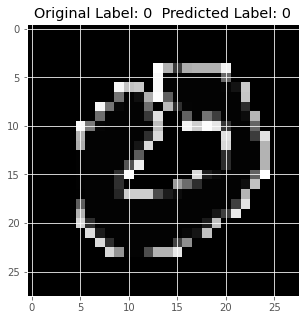

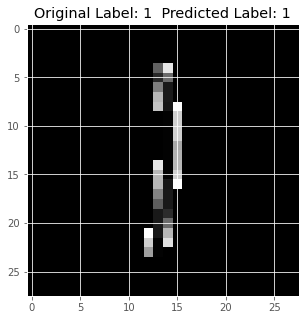

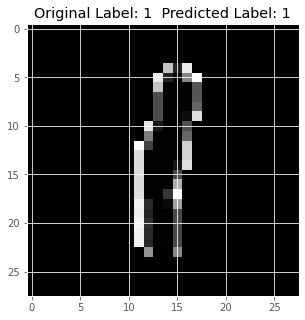

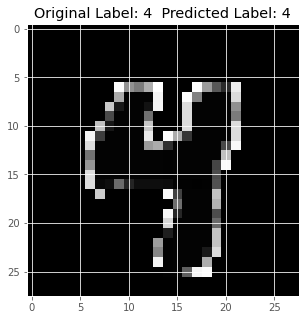

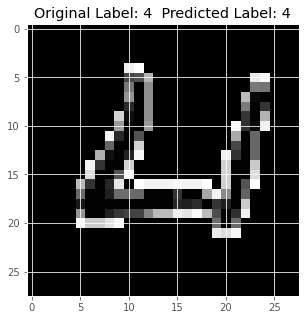

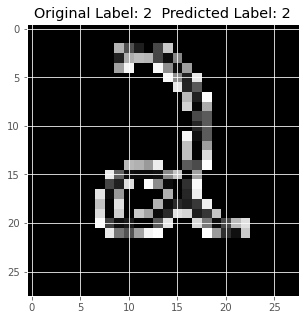

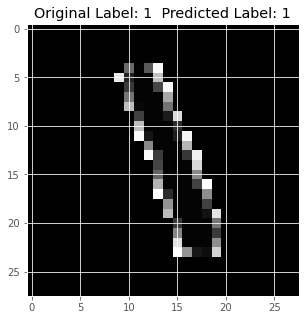

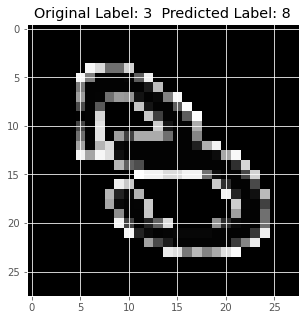

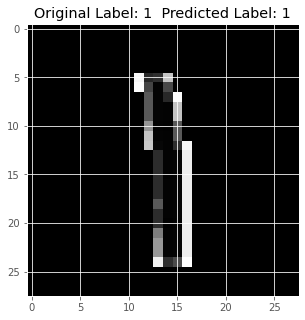

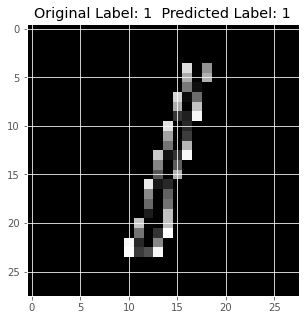

In [69]:
# Show the Test Images with Original and Predicted Labels
plt.rcParams["figure.figsize"] = (5,5)
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],nn_test_pred_labels[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()